In [2]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#calculate the average isolelectric point of each f the 7813 dereplicated viruses identified in WATL brine metagenomes

# Directory containing the .faa files
faa_dir = "/Users/skoog/Desktop/Picturesque_lake_split_by_contig_faa/"

# Output CSV file to store results
output_csv = "/Users/skoog/Desktop/Picturesque_lake_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Picturesque_lake_viromes_updated.csv"

# Initialize a list to store results
results = []

# Loop through each .faa file in the directory
for faa_file in os.listdir(faa_dir):
    if faa_file.endswith(".faa"):  # Process only .faa files
        file_path = os.path.join(faa_dir, faa_file)
        
        pi_values = []  # List to store pI values for this file
        
        # Read and analyze protein sequences
        for record in SeqIO.parse(file_path, "fasta"):
            protein_seq = str(record.seq)
            
            if protein_seq:  # Ensure sequence is not empty
                try:
                    analysis = ProteinAnalysis(protein_seq)
                    pi_values.append(analysis.isoelectric_point())  # Compute pI
                except Exception as e:
                    print(f"Skipping sequence {record.id} due to error: {e}")

        # Compute average pI for this .faa file
        avg_pi = sum(pi_values) / len(pi_values) if pi_values else 0
        results.append([faa_file, avg_pi])

        #print(f"Processed {faa_file}: Average pI = {avg_pi:.2f}")

# Save results to CSV
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Average_pI"])  # Write header
    writer.writerows(results)

#print(f"Results saved to {output_csv}")
import pandas as pd

Picturesque_lake_df = pd.read_csv("/Users/skoog/Desktop/Picturesque_lake_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Picturesque_lake_viromes_updated.csv")

Picturesque_lake_df.rename(columns={Picturesque_lake_df.columns[0]: "contig_id"}, inplace=True)
Picturesque_lake_df["contig_id"] = Picturesque_lake_df["contig_id"].str.replace(".faa", "", regex=False)
Picturesque_lake_df["name_full"] = "Picturesque Lake"

# Specify the file path with taxonomy information from genomad
taxonomy_df = pd.read_csv("/Users/skoog/Desktop/Picturesque_lake_split_by_contig_faa/all_checkv_quality_filtered_typical_atypical_dereplicated_viruses_from_genomad_virus_summary.tsv", sep="\t", header=0)


# Rename the first column to 'Viral_ID'
first_col = taxonomy_df.columns[0]
taxonomy_df.rename(columns={first_col: 'Viral_ID'}, inplace=True)

# Split the taxonomy column into separate columns
taxonomy_split = taxonomy_df['taxonomy'].str.split(';', expand=True)

# Assign the new columns to the dataframe
taxonomy_df[['virus', 'realm', 'kingdom', 'phylum', 'class', 'order', 'family']] = taxonomy_split

taxonomy_df.rename(columns={taxonomy_df.columns[0]: "contig_id"}, inplace=True)

def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

def fill_family(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in [ 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_family, axis=1)

# Display the first few rows

# Or if display truncates rows/columns:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# Merge the dataframes on a common column (modify 'common_column' to match actual column name)
Picturesque_lake_taxonomy_merged_df = Picturesque_lake_df.merge(taxonomy_df, on="contig_id", how="inner")  # Use 'outer' if you want all rows

#display(Picturesque_lake_taxonomy_merged_df)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/skoog/Desktop/WATL/Picturesque_lake_split_by_contig_faa/'

In [2]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#calculate the average isolelectric point of each f the 7813 dereplicated viruses identified in WATL brine metagenomes

faa_dir = "/Users/skoog/Desktop/Lake_tanatar_TC_split_by_contig_faa/"

# Output CSV file to store results
output_csv = "/Users/skoog/Desktop/Lake_tanatar_TC_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lake_tanatar_TC_viromes_updated.csv"

# Initialize a list to store results
results = []

# Loop through each .faa file in the directory
for faa_file in os.listdir(faa_dir):
    if faa_file.endswith(".faa"):  # Process only .faa files
        file_path = os.path.join(faa_dir, faa_file)
        
        pi_values = []  # List to store pI values for this file
        
        # Read and analyze protein sequences
        for record in SeqIO.parse(file_path, "fasta"):
            protein_seq = str(record.seq)
            
            if protein_seq:  # Ensure sequence is not empty
                try:
                    analysis = ProteinAnalysis(protein_seq)
                    pi_values.append(analysis.isoelectric_point())  # Compute pI
                except Exception as e:
                    print(f"Skipping sequence {record.id} due to error: {e}")

        # Compute average pI for this .faa file
        avg_pi = sum(pi_values) / len(pi_values) if pi_values else 0
        results.append([faa_file, avg_pi])

        #print(f"Processed {faa_file}: Average pI = {avg_pi:.2f}")

# Save results to CSV
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Average_pI"])  # Write header
    writer.writerows(results)

#print(f"Results saved to {output_csv}")
import pandas as pd

Lake_tanatar_TC_df = pd.read_csv("/Users/skoog/Desktop/Lake_tanatar_TC_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lake_tanatar_TC_viromes_updated.csv")

Lake_tanatar_TC_df.rename(columns={Lake_tanatar_TC_df.columns[0]: "contig_id"}, inplace=True)
Lake_tanatar_TC_df["contig_id"] = Lake_tanatar_TC_df["contig_id"].str.replace(".faa", "", regex=False)
Lake_tanatar_TC_df["name_full"] = "Lake Tanatar trona crystallizer"

import pandas as pd

# Specify the file path with taxonomy information from genomad
taxonomy_df = pd.read_csv("/Users/skoog/Desktop/Lake_tanatar_TC_split_by_contig_faa/all_checkv_quality_filtered_typical_atypical_dereplicated_viruses_from_genomad_virus_summary.tsv", sep="\t", header=0)


# Rename the first column to 'Viral_ID'
first_col = taxonomy_df.columns[0]
taxonomy_df.rename(columns={first_col: 'Viral_ID'}, inplace=True)

# Split the taxonomy column into separate columns
taxonomy_split = taxonomy_df['taxonomy'].str.split(';', expand=True)

# Assign the new columns to the dataframe
taxonomy_df[['virus', 'realm', 'kingdom', 'phylum', 'class', 'order', 'family']] = taxonomy_split

taxonomy_df.rename(columns={taxonomy_df.columns[0]: "contig_id"}, inplace=True)

def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

def fill_family(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in [ 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_family, axis=1)

# Display the first few rows

# Or if display truncates rows/columns:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# Merge the dataframes on a common column (modify 'common_column' to match actual column name)
Lake_tanatar_TC_taxonomy_merged_df = Lake_tanatar_TC_df.merge(taxonomy_df, on="contig_id", how="inner")  # Use 'outer' if you want all rows

#display(Lake_tanatar_TC_taxonomy_merged_df)

In [3]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#calculate the average isolelectric point of each f the 7813 dereplicated viruses identified in WATL brine metagenomes

# Directory containing the .faa files
faa_dir = "/Users/skoog/Desktop/Tanatar_5_split_by_contig_faa/"

# Output CSV file to store results
output_csv = "/Users/skoog/Desktop/Tanatar_5_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Tanatar_5_viromes_updated.csv"

# Initialize a list to store results
results = []

# Loop through each .faa file in the directory
for faa_file in os.listdir(faa_dir):
    if faa_file.endswith(".faa"):  # Process only .faa files
        file_path = os.path.join(faa_dir, faa_file)
        
        pi_values = []  # List to store pI values for this file
        
        # Read and analyze protein sequences
        for record in SeqIO.parse(file_path, "fasta"):
            protein_seq = str(record.seq)
            
            if protein_seq:  # Ensure sequence is not empty
                try:
                    analysis = ProteinAnalysis(protein_seq)
                    pi_values.append(analysis.isoelectric_point())  # Compute pI
                except Exception as e:
                    print(f"Skipping sequence {record.id} due to error: {e}")

        # Compute average pI for this .faa file
        avg_pi = sum(pi_values) / len(pi_values) if pi_values else 0
        results.append([faa_file, avg_pi])

        #print(f"Processed {faa_file}: Average pI = {avg_pi:.2f}")

# Save results to CSV
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Average_pI"])  # Write header
    writer.writerows(results)

#print(f"Results saved to {output_csv}")
import pandas as pd

Tanatar_5_df = pd.read_csv("/Users/skoog/Desktop/Tanatar_5_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Tanatar_5_viromes_updated.csv")

Tanatar_5_df.rename(columns={Tanatar_5_df.columns[0]: "contig_id"}, inplace=True)
Tanatar_5_df["contig_id"] = Tanatar_5_df["contig_id"].str.replace(".faa", "", regex=False)
Tanatar_5_df["name_full"] = "Lake Tanatar-5"

import pandas as pd

# Specify the file path with taxonomy information from genomad
taxonomy_df = pd.read_csv("/Users/skoog/Desktop/Tanatar_5_split_by_contig_faa/all_checkv_quality_filtered_typical_atypical_dereplicated_viruses_from_genomad_virus_summary.tsv", sep="\t", header=0)


# Rename the first column to 'Viral_ID'
first_col = taxonomy_df.columns[0]
taxonomy_df.rename(columns={first_col: 'Viral_ID'}, inplace=True)

# Split the taxonomy column into separate columns
taxonomy_split = taxonomy_df['taxonomy'].str.split(';', expand=True)

# Assign the new columns to the dataframe
taxonomy_df[['virus', 'realm', 'kingdom', 'phylum', 'class', 'order', 'family']] = taxonomy_split

taxonomy_df.rename(columns={taxonomy_df.columns[0]: "contig_id"}, inplace=True)

def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

def fill_family(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in [ 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_family, axis=1)

# Display the first few rows

# Or if display truncates rows/columns:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# Merge the dataframes on a common column (modify 'common_column' to match actual column name)
Tanatar_5_taxonomy_merged_df = Tanatar_5_df.merge(taxonomy_df, on="contig_id", how="inner")  # Use 'outer' if you want all rows

#display(Tanatar_5_taxonomy_merged_df)

In [4]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#calculate the average isolelectric point of each f the 7813 dereplicated viruses identified in WATL brine metagenomes

# Directory containing the .faa files
faa_dir = "/Users/skoog/Desktop/Lake_Bitter_1_split_by_contig_faa/"

# Output CSV file to store results
output_csv = "/Users/skoog/Desktop/Lake_Bitter_1_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lake_Bitter_viromes_updated.csv"

# Initialize a list to store results
results = []

# Loop through each .faa file in the directory
for faa_file in os.listdir(faa_dir):
    if faa_file.endswith(".faa"):  # Process only .faa files
        file_path = os.path.join(faa_dir, faa_file)
        
        pi_values = []  # List to store pI values for this file
        
        # Read and analyze protein sequences
        for record in SeqIO.parse(file_path, "fasta"):
            protein_seq = str(record.seq)
            
            if protein_seq:  # Ensure sequence is not empty
                try:
                    analysis = ProteinAnalysis(protein_seq)
                    pi_values.append(analysis.isoelectric_point())  # Compute pI
                except Exception as e:
                    print(f"Skipping sequence {record.id} due to error: {e}")

        # Compute average pI for this .faa file
        avg_pi = sum(pi_values) / len(pi_values) if pi_values else 0
        results.append([faa_file, avg_pi])

        #print(f"Processed {faa_file}: Average pI = {avg_pi:.2f}")

# Save results to CSV
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Average_pI"])  # Write header
    writer.writerows(results)

#print(f"Results saved to {output_csv}")
import pandas as pd

Lake_bitter_df = pd.read_csv("/Users/skoog/Desktop/Lake_Bitter_1_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lake_Bitter_viromes_updated.csv")

Lake_bitter_df.rename(columns={Lake_bitter_df.columns[0]: "contig_id"}, inplace=True)
Lake_bitter_df["contig_id"] = Lake_bitter_df["contig_id"].str.replace(".faa", "", regex=False)
Lake_bitter_df["name_full"] = "Lake Bitter-1"

import pandas as pd

# Specify the file path with taxonomy information from genomad
taxonomy_df = pd.read_csv("/Users/skoog/Desktop/Lake_Bitter_1_split_by_contig_faa/all_checkv_quality_filtered_typical_atypical_dereplicated_viruses_from_genomad_virus_summary.tsv", sep="\t", header=0)


# Rename the first column to 'Viral_ID'
first_col = taxonomy_df.columns[0]
taxonomy_df.rename(columns={first_col: 'Viral_ID'}, inplace=True)

# Split the taxonomy column into separate columns
taxonomy_split = taxonomy_df['taxonomy'].str.split(';', expand=True)

# Assign the new columns to the dataframe
taxonomy_df[['virus', 'realm', 'kingdom', 'phylum', 'class', 'order', 'family']] = taxonomy_split

taxonomy_df.rename(columns={taxonomy_df.columns[0]: "contig_id"}, inplace=True)

def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

def fill_family(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in [ 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_family, axis=1)

# Display the first few rows

# Or if display truncates rows/columns:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# Merge the dataframes on a common column (modify 'common_column' to match actual column name)
Lake_bitter_df_taxonomy_merged_df = Lake_bitter_df.merge(taxonomy_df, on="contig_id", how="inner")  # Use 'outer' if you want all rows

#display(Lake_bitter_df_taxonomy_merged_df)

In [5]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#calculate the average isolelectric point of each f the 7813 dereplicated viruses identified in WATL brine metagenomes

# Directory containing the .faa files
faa_dir = "/Users/skoog/Desktop/Cueva_de_la_mora_lake_11m_split_by_contig_faa/"

# Output CSV file to store results
output_csv = "/Users/skoog/Desktop/Cueva_de_la_mora_lake_11m_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lake_Bitter_viromes_updated.csv"

# Initialize a list to store results
results = []

# Loop through each .faa file in the directory
for faa_file in os.listdir(faa_dir):
    if faa_file.endswith(".faa"):  # Process only .faa files
        file_path = os.path.join(faa_dir, faa_file)
        
        pi_values = []  # List to store pI values for this file
        
        # Read and analyze protein sequences
        for record in SeqIO.parse(file_path, "fasta"):
            protein_seq = str(record.seq)
            
            if protein_seq:  # Ensure sequence is not empty
                try:
                    analysis = ProteinAnalysis(protein_seq)
                    pi_values.append(analysis.isoelectric_point())  # Compute pI
                except Exception as e:
                    print(f"Skipping sequence {record.id} due to error: {e}")

        # Compute average pI for this .faa file
        avg_pi = sum(pi_values) / len(pi_values) if pi_values else 0
        results.append([faa_file, avg_pi])

        #print(f"Processed {faa_file}: Average pI = {avg_pi:.2f}")

# Save results to CSV
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Average_pI"])  # Write header
    writer.writerows(results)

#print(f"Results saved to {output_csv}")
import pandas as pd

Cueva_de_la_mora_lake_11m_df = pd.read_csv("/Users/skoog/Desktop/Cueva_de_la_mora_lake_11m_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lake_Bitter_viromes_updated.csv")

Cueva_de_la_mora_lake_11m_df.rename(columns={Cueva_de_la_mora_lake_11m_df.columns[0]: "contig_id"}, inplace=True)
Cueva_de_la_mora_lake_11m_df["contig_id"] = Cueva_de_la_mora_lake_11m_df["contig_id"].str.replace(".faa", "", regex=False)
Cueva_de_la_mora_lake_11m_df["name_full"] = "Cueva de la Mora lake - Chemocline (11m)"

import pandas as pd

# Specify the file path with taxonomy information from genomad
taxonomy_df = pd.read_csv("/Users/skoog/Desktop/Cueva_de_la_mora_lake_11m_split_by_contig_faa/all_checkv_quality_filtered_typical_atypical_dereplicated_viruses_from_genomad_virus_summary.tsv", sep="\t", header=0)


# Rename the first column to 'Viral_ID'
first_col = taxonomy_df.columns[0]
taxonomy_df.rename(columns={first_col: 'contig_id'}, inplace=True)

import numpy as np

taxonomy_split = taxonomy_df['taxonomy'].str.split(';', expand=True)

taxonomy_df[['virus', 'realm', 'kingdom', 'phylum', 'class', 'order', 'family']] = (
    pd.DataFrame(taxonomy_split)
    .reindex(columns=range(7), fill_value=np.nan)
)


def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

def fill_family(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in [ 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_family, axis=1)


# Display the first few rows

# Or if display truncates rows/columns:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# Merge the dataframes on a common column (modify 'common_column' to match actual column name)
Cueva_de_la_mora_lake_11m_taxonomy_merged_df = Cueva_de_la_mora_lake_11m_df.merge(taxonomy_df, on="contig_id", how="inner")  # Use 'outer' if you want all rows

#display(Cueva_de_la_mora_lake_11m_taxonomy_merged_df)

In [6]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#calculate the average isolelectric point of each f the 7813 dereplicated viruses identified in WATL brine metagenomes

# Directory containing the .faa files
faa_dir = "/Users/skoog/Desktop/Cueva_de_la_mora_lake_35m_split_by_contig_faa/"

# Output CSV file to store results
output_csv = "/Users/skoog/Desktop/Cueva_de_la_mora_lake_35m_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lake_Bitter_viromes_updated.csv"

# Initialize a list to store results
results = []

# Loop through each .faa file in the directory
for faa_file in os.listdir(faa_dir):
    if faa_file.endswith(".faa"):  # Process only .faa files
        file_path = os.path.join(faa_dir, faa_file)
        
        pi_values = []  # List to store pI values for this file
        
        # Read and analyze protein sequences
        for record in SeqIO.parse(file_path, "fasta"):
            protein_seq = str(record.seq)
            
            if protein_seq:  # Ensure sequence is not empty
                try:
                    analysis = ProteinAnalysis(protein_seq)
                    pi_values.append(analysis.isoelectric_point())  # Compute pI
                except Exception as e:
                    print(f"Skipping sequence {record.id} due to error: {e}")

        # Compute average pI for this .faa file
        avg_pi = sum(pi_values) / len(pi_values) if pi_values else 0
        results.append([faa_file, avg_pi])

        #print(f"Processed {faa_file}: Average pI = {avg_pi:.2f}")

# Save results to CSV
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Average_pI"])  # Write header
    writer.writerows(results)

#print(f"Results saved to {output_csv}")
import pandas as pd

Cueva_de_la_mora_lake_35m_df = pd.read_csv("/Users/skoog/Desktop/Cueva_de_la_mora_lake_35m_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lake_Bitter_viromes_updated.csv")

Cueva_de_la_mora_lake_35m_df.rename(columns={Cueva_de_la_mora_lake_35m_df.columns[0]: "contig_id"}, inplace=True)
Cueva_de_la_mora_lake_35m_df["contig_id"] = Cueva_de_la_mora_lake_35m_df["contig_id"].str.replace(".faa", "", regex=False)
Cueva_de_la_mora_lake_35m_df["name_full"] = "Cueva de la Mora lake - Deep Anoxic Layer (35m)"

import pandas as pd

# Specify the file path with taxonomy information from genomad
taxonomy_df = pd.read_csv("/Users/skoog/Desktop/Cueva_de_la_mora_lake_35m_split_by_contig_faa/all_checkv_quality_filtered_typical_atypical_dereplicated_viruses_from_genomad_virus_summary.tsv", sep="\t", header=0)


# Rename the first column to 'Viral_ID'
first_col = taxonomy_df.columns[0]
taxonomy_df.rename(columns={first_col: 'contig_id'}, inplace=True)

import numpy as np

taxonomy_split = taxonomy_df['taxonomy'].str.split(';', expand=True)

taxonomy_df[['virus', 'realm', 'kingdom', 'phylum', 'class', 'order', 'family']] = (
    pd.DataFrame(taxonomy_split)
    .reindex(columns=range(7), fill_value=np.nan)
)


def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

def fill_family(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in [ 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_family, axis=1)


# Display the first few rows

# Or if display truncates rows/columns:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# Merge the dataframes on a common column (modify 'common_column' to match actual column name)
Cueva_de_la_mora_lake_35m_taxonomy_merged_df = Cueva_de_la_mora_lake_35m_df.merge(taxonomy_df, on="contig_id", how="inner")  # Use 'outer' if you want all rows

#display(Cueva_de_la_mora_lake_35m_taxonomy_merged_df)

In [7]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#calculate the average isolelectric point of each f the 7813 dereplicated viruses identified in WATL brine metagenomes

# Directory containing the .faa files
faa_dir = "/Users/skoog/Desktop/Cueva_de_la_mora_lake_3m_split_by_contig_faa/"

# Output CSV file to store results
output_csv = "/Users/skoog/Desktop/Cueva_de_la_mora_lake_3m_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lake_Bitter_viromes_updated.csv"

# Initialize a list to store results
results = []

# Loop through each .faa file in the directory
for faa_file in os.listdir(faa_dir):
    if faa_file.endswith(".faa"):  # Process only .faa files
        file_path = os.path.join(faa_dir, faa_file)
        
        pi_values = []  # List to store pI values for this file
        
        # Read and analyze protein sequences
        for record in SeqIO.parse(file_path, "fasta"):
            protein_seq = str(record.seq)
            
            if protein_seq:  # Ensure sequence is not empty
                try:
                    analysis = ProteinAnalysis(protein_seq)
                    pi_values.append(analysis.isoelectric_point())  # Compute pI
                except Exception as e:
                    print(f"Skipping sequence {record.id} due to error: {e}")

        # Compute average pI for this .faa file
        avg_pi = sum(pi_values) / len(pi_values) if pi_values else 0
        results.append([faa_file, avg_pi])

        #print(f"Processed {faa_file}: Average pI = {avg_pi:.2f}")

# Save results to CSV
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Average_pI"])  # Write header
    writer.writerows(results)

#print(f"Results saved to {output_csv}")
import pandas as pd

Cueva_de_la_mora_lake_3m_df = pd.read_csv("/Users/skoog/Desktop/Cueva_de_la_mora_lake_3m_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lake_Bitter_viromes_updated.csv")

Cueva_de_la_mora_lake_3m_df.rename(columns={Cueva_de_la_mora_lake_3m_df.columns[0]: "contig_id"}, inplace=True)
Cueva_de_la_mora_lake_3m_df["contig_id"] = Cueva_de_la_mora_lake_3m_df["contig_id"].str.replace(".faa", "", regex=False)
Cueva_de_la_mora_lake_3m_df["name_full"] = "Cueva de la Mora lake - Upper Oxic Layer (3m)"

import pandas as pd

# Specify the file path with taxonomy information from genomad
taxonomy_df = pd.read_csv("/Users/skoog/Desktop/Cueva_de_la_mora_lake_3m_split_by_contig_faa/all_checkv_quality_filtered_typical_atypical_dereplicated_viruses_from_genomad_virus_summary.tsv", sep="\t", header=0)


# Rename the first column to 'Viral_ID'
first_col = taxonomy_df.columns[0]
taxonomy_df.rename(columns={first_col: 'contig_id'}, inplace=True)

import numpy as np

taxonomy_split = taxonomy_df['taxonomy'].str.split(';', expand=True)

taxonomy_df[['virus', 'realm', 'kingdom', 'phylum', 'class', 'order', 'family']] = (
    pd.DataFrame(taxonomy_split)
    .reindex(columns=range(7), fill_value=np.nan)
)


def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

def fill_family(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in [ 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_family, axis=1)


# Display the first few rows

# Or if display truncates rows/columns:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# Merge the dataframes on a common column (modify 'common_column' to match actual column name)
Cueva_de_la_mora_lake_3m_taxonomy_merged_df = Cueva_de_la_mora_lake_3m_df.merge(taxonomy_df, on="contig_id", how="inner")  # Use 'outer' if you want all rows

#display(Cueva_de_la_mora_lake_3m_taxonomy_merged_df)

In [8]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#calculate the average isolelectric point of each f the 7813 dereplicated viruses identified in WATL brine metagenomes

faa_dir = "/Users/skoog/Desktop/Cock_soda_lake_split_by_contig_faa/"

# Output CSV file to store results
output_csv = "/Users/skoog/Desktop/Cock_soda_lake_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Cock_soda_lake_viromes_updated.csv"

# Initialize a list to store results
results = []

# Loop through each .faa file in the directory
for faa_file in os.listdir(faa_dir):
    if faa_file.endswith(".faa"):  # Process only .faa files
        file_path = os.path.join(faa_dir, faa_file)
        
        pi_values = []  # List to store pI values for this file
        
        # Read and analyze protein sequences
        for record in SeqIO.parse(file_path, "fasta"):
            protein_seq = str(record.seq)
            
            if protein_seq:  # Ensure sequence is not empty
                try:
                    analysis = ProteinAnalysis(protein_seq)
                    pi_values.append(analysis.isoelectric_point())  # Compute pI
                except Exception as e:
                    print(f"Skipping sequence {record.id} due to error: {e}")

        # Compute average pI for this .faa file
        avg_pi = sum(pi_values) / len(pi_values) if pi_values else 0
        results.append([faa_file, avg_pi])

        #print(f"Processed {faa_file}: Average pI = {avg_pi:.2f}")

# Save results to CSV
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Average_pI"])  # Write header
    writer.writerows(results)

#print(f"Results saved to {output_csv}")
import pandas as pd

Cock_soda_lake_df = pd.read_csv("/Users/skoog/Desktop/Cock_soda_lake_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Cock_soda_lake_viromes_updated.csv")

Cock_soda_lake_df.rename(columns={Cock_soda_lake_df.columns[0]: "contig_id"}, inplace=True)
Cock_soda_lake_df["contig_id"] = Cock_soda_lake_df["contig_id"].str.replace(".faa", "", regex=False)
Cock_soda_lake_df["name_full"] = "Cock Soda Lake"

import pandas as pd

# Specify the file path with taxonomy information from genomad
taxonomy_df = pd.read_csv("/Users/skoog/Desktop/Cock_soda_lake_split_by_contig_faa/all_checkv_quality_filtered_typical_atypical_dereplicated_viruses_from_genomad_virus_summary.tsv", sep="\t", header=0)


# Rename the first column to 'Viral_ID'
first_col = taxonomy_df.columns[0]
taxonomy_df.rename(columns={first_col: 'Viral_ID'}, inplace=True)

# Split the taxonomy column into separate columns
taxonomy_split = taxonomy_df['taxonomy'].str.split(';', expand=True)

# Assign the new columns to the dataframe
taxonomy_df[['virus', 'realm', 'kingdom', 'phylum', 'class', 'order', 'family']] = taxonomy_split

taxonomy_df.rename(columns={taxonomy_df.columns[0]: "contig_id"}, inplace=True)

def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

def fill_family(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in [ 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_family, axis=1)

# Display the first few rows

# Or if display truncates rows/columns:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# Merge the dataframes on a common column (modify 'common_column' to match actual column name)
Cock_soda_lake_taxonomy_merged_df = Cock_soda_lake_df.merge(taxonomy_df, on="contig_id", how="inner")  # Use 'outer' if you want all rows

#display(Lake_tanatar_TC_taxonomy_merged_df)

In [9]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#calculate the average isolelectric point of each f the 7813 dereplicated viruses identified in WATL brine metagenomes

faa_dir = "/Users/skoog/Desktop/Lost_city_split_by_contig_faa/Lost_city_split_by_contig_faa"

# Output CSV file to store results
output_csv = "/Users/skoog/Desktop/Lost_city_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lost_city_viromes_updated.csv"

# Initialize a list to store results
results = []

# Loop through each .faa file in the directory
for faa_file in os.listdir(faa_dir):
    if faa_file.endswith(".faa"):  # Process only .faa files
        file_path = os.path.join(faa_dir, faa_file)
        
        pi_values = []  # List to store pI values for this file
        
        # Read and analyze protein sequences
        for record in SeqIO.parse(file_path, "fasta"):
            protein_seq = str(record.seq)
            
            if protein_seq:  # Ensure sequence is not empty
                try:
                    analysis = ProteinAnalysis(protein_seq)
                    pi_values.append(analysis.isoelectric_point())  # Compute pI
                except Exception as e:
                    print(f"Skipping sequence {record.id} due to error: {e}")

        # Compute average pI for this .faa file
        avg_pi = sum(pi_values) / len(pi_values) if pi_values else 0
        results.append([faa_file, avg_pi])

        #print(f"Processed {faa_file}: Average pI = {avg_pi:.2f}")

# Save results to CSV
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Average_pI"])  # Write header
    writer.writerows(results)

#print(f"Results saved to {output_csv}")
import pandas as pd

Lost_city_df = pd.read_csv("/Users/skoog/Desktop/Lost_city_split_by_contig_faa/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_Lost_city_viromes_updated.csv")

Lost_city_df.rename(columns={Lost_city_df.columns[0]: "contig_id"}, inplace=True)
Lost_city_df["contig_id"] = Lost_city_df["contig_id"].str.replace(".faa", "", regex=False)
Lost_city_df["name_full"] = "Lost City"

import pandas as pd

# Specify the file path with taxonomy information from genomad
taxonomy_df = pd.read_csv("/Users/skoog/Desktop/Lost_city_split_by_contig_faa/all_checkv_quality_filtered_typical_atypical_dereplicated_viruses_from_genomad_virus_summary.tsv", sep="\t", header=0)


# Rename the first column to 'Viral_ID'
first_col = taxonomy_df.columns[0]
taxonomy_df.rename(columns={first_col: 'Viral_ID'}, inplace=True)

# Split the taxonomy column into separate columns
taxonomy_split = taxonomy_df['taxonomy'].str.split(';', expand=True)

# Assign the new columns to the dataframe
taxonomy_df[['virus', 'realm', 'kingdom', 'phylum', 'class', 'order', 'family']] = taxonomy_split

taxonomy_df.rename(columns={taxonomy_df.columns[0]: "contig_id"}, inplace=True)

def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

def fill_family(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in [ 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_family, axis=1)

# Display the first few rows

# Or if display truncates rows/columns:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# Merge the dataframes on a common column (modify 'common_column' to match actual column name)
Lost_city_taxonomy_merged_df = Lost_city_df.merge(taxonomy_df, on="contig_id", how="inner")  # Use 'outer' if you want all rows

#display(Lost_city_taxonomy_merged_df)

In [10]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#calculate the average isolelectric point of each f the 7813 dereplicated viruses identified in WATL brine metagenomes

# Directory containing the .faa files
faa_dir = "/Users/skoog/Desktop/WATL/viral_structural_genes_of_freshwater_IMGVR_viromes_all_merged_blast_NCBI_Refeq_and_VOG/split_by_contig_faa/"

# Output CSV file to store results
output_csv = "/Users/skoog/Desktop/WATL/viral_structural_genes_of_freshwater_IMGVR_viromes_all_merged_blast_NCBI_Refeq_and_VOG/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_freshwater_IMGVR_viromes_updated2.csv"

# Initialize a list to store results
results = []

# Loop through each .faa file in the directory
for faa_file in os.listdir(faa_dir):
    if faa_file.endswith(".faa"):  # Process only .faa files
        file_path = os.path.join(faa_dir, faa_file)
        
        pi_values = []  # List to store pI values for this file
        
        # Read and analyze protein sequences
        for record in SeqIO.parse(file_path, "fasta"):
            protein_seq = str(record.seq)
            
            if protein_seq:  # Ensure sequence is not empty
                try:
                    analysis = ProteinAnalysis(protein_seq)
                    pi_values.append(analysis.isoelectric_point())  # Compute pI
                except Exception as e:
                    print(f"Skipping sequence {record.id} due to error: {e}")

        # Compute average pI for this .faa file
        avg_pi = sum(pi_values) / len(pi_values) if pi_values else 0
        results.append([faa_file, avg_pi])

        #print(f"Processed {faa_file}: Average pI = {avg_pi:.2f}")

# Save results to CSV
with open(output_csv, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Average_pI"])  # Write header
    writer.writerows(results)

import pandas as pd


# Save or display the updated dataframe
df = pd.read_csv("/Users/skoog/Desktop/WATL/viral_structural_genes_of_freshwater_IMGVR_viromes_all_merged_blast_NCBI_Refeq_and_VOG/average_pI_results_for_viral_sructural_proteins_nbci_vog_db_freshwater_IMGVR_viromes_updated2.csv")
#rename the first column to contig_id so that we can merge it with the "metadata" dataframe that contains the viral classification for each contig_id
df.rename(columns={df.columns[0]: "contig_id"}, inplace=True)
# Remove the string 'viral_structural_genes_' from the beginning of the first column
df.iloc[:, 0] = df.iloc[:, 0].str.replace(r'^viral_structural_genes_', '', regex=True)
# Remove the first underscore from every value in the dataframe
df = df.replace(to_replace=r'^_', value='', regex=True)
# Modify the first column by removing the specified prefix and suffix
df.iloc[:, 0] = df.iloc[:, 0].str.replace(r'^viral_structural_genes_\.part_', '', regex=True)
df.iloc[:, 0] = df.iloc[:, 0].str.replace(r"\.faa$", "", regex=True)

# Remove everything after the 4th underscore in the first column
def clean_first_column(value):
    parts = value.split('_')
    if len(parts) > 4:
        return '_'.join(parts[:4])
    return value

# Apply the function to the first column
df.iloc[:, 0] = df.iloc[:, 0].astype(str).apply(clean_first_column)


import pandas as pd

# Specify the file path with taxonomy information from genomad
taxonomy_file = "/Users/skoog/Desktop/WATL/IMG_VR_2022-12-19_7.1/IMGVR_freshwater_virus_metadata.xlsx"

# Read the TSV file
taxonomy_df = pd.read_excel(taxonomy_file)

# Rename the first column to 'Viral_ID'
first_col = taxonomy_df.columns[0]
taxonomy_df.rename(columns={first_col: 'Viral_ID'}, inplace=True)

# Split the taxonomy column into separate columns
taxonomy_split = taxonomy_df['Taxonomic classification'].str.split(';', expand=True)

# Assign the new columns to the dataframe
taxonomy_df[['realm', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']] = taxonomy_split

taxonomy_df.rename(columns={taxonomy_df.columns[0]: "contig_id"}, inplace=True)

taxonomy_df["realm"] = taxonomy_df["realm"].str.replace("r__", "", regex=False)
taxonomy_df["kingdom"] = taxonomy_df["kingdom"].str.replace("k__", "", regex=False)
taxonomy_df["phylum"] = taxonomy_df["phylum"].str.replace("p__", "", regex=False)
taxonomy_df["class"] = taxonomy_df["class"].str.replace("c__", "", regex=False)
taxonomy_df["order"] = taxonomy_df["order"].str.replace("o__", "", regex=False)
taxonomy_df["family"] = taxonomy_df["family"].str.replace("f__", "", regex=False)


def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

# Replace missing or empty values in 'order' and 'family' columns
def fill_order(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in ['class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_order, axis=1)


# Merge the dataframes on a common column (modify 'common_column' to match actual column name)
freshwater_merged_df = df.merge(taxonomy_df, on="contig_id", how="inner")  # Use 'outer' if you want all rows

freshwater_merged_df["name_full"] = "Freshwater (IMG)"



# Save or display the merged dataframe
#merged_df.to_csv("/Users/skoog/Desktop/WATL/structural_virus_pI_merged_output_vog_ncbi.csv", index=False)
#display(freshwater_merged_df)  # Show first few rows


In [11]:
dfs = [Lake_tanatar_TC_taxonomy_merged_df, Lost_city_taxonomy_merged_df, Cock_soda_lake_taxonomy_merged_df, Lake_bitter_df_taxonomy_merged_df, Tanatar_5_taxonomy_merged_df, Picturesque_lake_taxonomy_merged_df, Cueva_de_la_mora_lake_11m_taxonomy_merged_df, Cueva_de_la_mora_lake_3m_taxonomy_merged_df, Cueva_de_la_mora_lake_35m_taxonomy_merged_df]
all_extreme_env_merged_df = pd.concat(dfs, ignore_index=True)
#display(all_extreme_env_merged_df)

In [12]:
import pandas as pd

# Get the intersection of column names
common_cols = freshwater_merged_df.columns.intersection(all_extreme_env_merged_df.columns)

# Merge (stack) using only the common columns
freshwater_and_all_extreme_env_merged_df = pd.concat(
    [freshwater_merged_df[common_cols], all_extreme_env_merged_df[common_cols]],
    ignore_index=True
)

freshwater_and_all_extreme_env_merged_df["Present"] = "1"

# Specify the file path with taxonomy information from genomad
other_env = "/Users/skoog/Desktop/Other_environments.xlsx"

# Read the TSV file
other_env_df = pd.read_excel(other_env)

freshwater_and_all_extreme_env_merged_df_with_metadata = pd.merge(
    freshwater_and_all_extreme_env_merged_df,
    other_env_df,
    on="name_full",
    how="outer"   # keeps all rows from both
)


#display(freshwater_and_all_extreme_env_merged_df_with_metadata)

In [13]:
import os
import glob
import pandas as pd
from functools import reduce

# -------------------------------
# STEP 1: Load and merge RPKM files
# -------------------------------

# Path to your RPKM files
directory = '/Users/skoog/Desktop/WATL24_metagenomics_viromics/coverm_viral_relative_abundance_in_brines'
pattern = os.path.join(directory, "*_rpkm_95")
file_list = glob.glob(pattern)

dfs = []
for file in file_list:
    df = pd.read_csv(file, sep="\t")
    df.rename(columns={df.columns[0]: 'contig_id'}, inplace=True)

    # Extract clean Sample_ID
    sample_id = os.path.basename(file).replace("coverm_output_", "").replace("_sorted.bam_viral_rpkm_95", "")
    df.rename(columns={df.columns[1]: sample_id}, inplace=True)
    dfs.append(df)

# Merge all dataframes on Viral_ID
merged_df = reduce(lambda left, right: pd.merge(left, right, on='contig_id', how='outer'), dfs)
merged_df.fillna(0, inplace=True)

# -------------------------------
# STEP 2: Filter to specific Sample_IDs
# -------------------------------

sample_ids_to_keep = [
    "240111_N1_DNA_S1_L001", "240111_N2_VIROME_S26_L001", "240111_N3_DNA_S3_L001",
    "240111_N3A_sed_DNA_S24_L001", "240111_N3B_DNA_S4_L001", "240111_N3B_VIROME_S28_L001",
    "240113_N4_DNA_S6_L001", "240113_N4_VIROME_S29_L001", "240113_N5_DNA_S7_L001",
    "240113_N5_VIROME_S30_L001", "240114_N7A_VIROME_S31_L001", "240114_N7B_DNA_S9_L001",
    "240114_N7B_VIROME_S32_L001", "240114_N9_DNA_S11_L001", "240114_N9_mat_DNA_S21_L001",
    "240114_N9_VIROME_S34_L001", "240115_N10_DNA_S12_L001", "240115_N10_VIROME_S35_L001",
    "240115_N11_mat_DNA_S22_L001", "240115_N9_mat_DNA_S23_L001", "240116_N11_DNA_S13_L001",
    "240116_N11_VIROME_S36_L001", "240116_N12_DNA_S14_L001", "240116_N12_VIROME_S37_L001",
    "240116_N13_DNA_S15_L001", "240116_N13_VIROME_S38_L001", "240117_GW01_DNA_S18_L001",
    "240117_GW01_VIROME_S41_L001", "240117_N14_VIROME_S39_L001", "240117_N15_DNA_S17_L001",
    "240117_N15_VIROME_S52_L002", "240119_GW02_VIROME_S42_L001", "240119_GW03_DNA_S20_L001",
    "240120_N3C_DNA_S5_L001", "240120_N3C_VIROME_S27_L001"
]

# Filter columns to just Viral_ID and selected Sample_IDs
# Get actual column names from the merged DataFrame
available_columns = merged_df.columns.tolist()

# Filter sample_ids_to_keep to only those that are actually present in the DataFrame
matching_sample_ids = [sid for sid in sample_ids_to_keep if sid in available_columns]

# Proceed with subsetting
filtered_df = merged_df[['contig_id'] + matching_sample_ids]

# Load taxonomy file (adjust path if needed)
taxonomy_path = "/Users/skoog/Desktop/WATL24_metagenomics_viromics/all_checkv_quality_filtered_typical_atypical_dereplicated_viruses_from_genomad_virsorter2_virus_summary.tsv"
taxonomy_df = pd.read_csv(taxonomy_path, sep="\t")

# Rename first column to 'Viral_ID' if necessary
taxonomy_df.rename(columns={taxonomy_df.columns[0]: 'contig_id'}, inplace=True)

# Split taxonomy string into columns (if needed)
if 'taxonomy' in taxonomy_df.columns:
    tax_split = taxonomy_df['taxonomy'].str.split(';', expand=True)
    taxonomy_df[['virus', 'realm', 'kingdom', 'phylum', 'class', 'order', 'family']] = tax_split

def fill_family(row):
    if pd.notna(row['family']) and row['family'].strip() != '':
        return row['family']
    # Check from most specific to broader taxonomic levels
    for level in [ 'order', 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['family'] = taxonomy_df.apply(fill_family, axis=1)

def fill_family(row):
    if pd.notna(row['order']) and row['order'].strip() != '':
        return row['order']
    # Check from most specific to broader taxonomic levels
    for level in [ 'class', 'phylum', 'kingdom', 'realm']:
        if pd.notna(row.get(level)) and row[level].strip() != '':
            return f"Unclassified {row[level]}"
    return "Unclassified"

taxonomy_df['order'] = taxonomy_df.apply(fill_family, axis=1)


# Columns to keep fixed (ID variables)
id_vars = ["contig_id"]

# Melt everything else into 'sample' and 'abundance'
filtered_long_df = filtered_df.melt(
    id_vars=id_vars,
    var_name="sample",       # column name for abundance column headers
    value_name="abundance"   # column name for abundance values
)

wet_and_dry_df = pd.read_csv("/Users/skoog/Desktop/WATL/viral_structural_genes_of_quality_filtered_brine_viral_contigs/merged_df_wet_and_dry_with_df.csv")

wet_and_dry_filtered_with_tax_abundance = pd.merge(
    filtered_long_df,
    wet_and_dry_df,
    on="contig_id",
    how="outer"   # keeps all rows from both
)

wet_and_dry_filtered_with_tax_abundance = (
    wet_and_dry_filtered_with_tax_abundance[
        wet_and_dry_filtered_with_tax_abundance["contig_id"] != 
        "genomad_k141_1879475|provirus_191_53337"
    ]
)


dry_filtered_with_tax_abundance = wet_and_dry_filtered_with_tax_abundance.dropna(subset=["sample"])
dry_filtered_with_tax_abundance2 = dry_filtered_with_tax_abundance.dropna(subset=["Average_pI"])
dry_filtered_with_tax_abundance3 = dry_filtered_with_tax_abundance2.dropna(subset=["realm"])

# keep only rows where 'abundance' is not zero (NaNs are kept)
dry_filtered_with_tax_abundance3 = dry_filtered_with_tax_abundance3[
    pd.to_numeric(dry_filtered_with_tax_abundance3['abundance'], errors='coerce').ne(0)
]

####### ADD SALINITY AND ACIDIY DATA TO THE DRY SEASON
import pandas as pd

# 1) Load the Excel file
dry_env_df = pd.read_excel("/Users/skoog/Desktop/WATL24_dry_season_lake_salinity_acidity_v3.xlsx")

# 2) Rename the first column to 'sample'
first_col_name = dry_env_df.columns[0]
dry_env_df = dry_env_df.rename(columns={first_col_name: "sample"})

# 3) Merge with dry_filtered_with_tax_abundance3 based on 'sample'
dry_filtered_with_tax_abundance3_with_metadata = pd.merge(
    dry_filtered_with_tax_abundance3,
    dry_env_df,
    on="sample",
    how="left"  # keep all rows from dry_filtered_with_tax_abundance3
)

dry_filtered_with_tax_abundance3_with_metadata = dry_filtered_with_tax_abundance3_with_metadata.dropna(subset=["Aw"])

import os
import glob
import pandas as pd
from functools import reduce

# Set the directory path
directory = '/Users/skoog/Desktop/WATL/WATL_Viral_brine_RPKM'

# Define the pattern to match files ending with "_rpkm_0.85" (regardless of extension)
pattern = os.path.join(directory, "*_rpkm_0.85*")
file_list = glob.glob(pattern)

# List to store each processed DataFrame
dfs = []

for file in file_list:
    # Read the file; adjust 'sep' if your files use a different delimiter (e.g., ',' for CSV)
    df = pd.read_csv(file, sep='\t', header=0)
    
    # Rename the first column to 'Viral_ID'
    first_col = df.columns[0]
    df.rename(columns={first_col: 'contig_id'}, inplace=True)
    
    dfs.append(df)

# Merge all DataFrames on 'Viral_ID' using an outer join
merged_df = reduce(lambda left, right: pd.merge(left, right, on='contig_id', how='outer'), dfs)

# Optionally, save the merged DataFrame to a CSV file
merged_file_path = os.path.join(directory, "merged_file.csv")
merged_df.to_csv(merged_file_path, index=False)

#remove Lake Kookordine South because no pH
merged_df.drop('220806_BK_F6D_DNA_brine_sorted RPKM', axis=1, inplace=True)


import pandas as pd
import os

# Define the path to the taxonomy file
taxonomy_file = '/Users/skoog/Desktop/WATL/vOTU_taxonomy_merged_df.xlsx'

# Read the Excel file into a DataFrame
df_taxonomy = pd.read_excel(taxonomy_file)

# Rename the first column to 'Viral_ID'
first_col = df_taxonomy.columns[0]
df_taxonomy.rename(columns={first_col: 'contig_id'}, inplace=True)

# Merge the taxonomy information (family-level) with the previously merged DataFrame.
# It assumes that the taxonomy DataFrame contains a column named 'family'.

merged_with_tax = pd.merge(
    merged_df,
    df_taxonomy,
    on="contig_id",
    how="outer"   # keeps all rows from both
)

cols_to_remove = [
    "source", "contig_length", "provirus", "proviral_length",
    "checkv_quality", "miuvig_quality", "completeness",
    "completeness_method", "contamination", "TRUE.",	"FALSE.",	"sample_type",	"Cluster_Size",
    "kmer_freq",	"warnings",	"virus_score",	"fdr",	"n_hallmarks",	"marker_enrichment"	
]

merged_with_tax = merged_with_tax.drop(columns=cols_to_remove, errors="ignore")

# Columns to keep fixed (ID variables)
id_vars = ["contig_id", "realm", "kingdom",	"phylum",	"class",	"order", "family"]

# Melt everything else into 'sample' and 'abundance'
merged_with_tax_long_df = merged_with_tax.melt(
    id_vars=id_vars,
    var_name="sample",       # column name for abundance column headers
    value_name="abundance"   # column name for abundance values
)

merged_with_tax_long_df = merged_with_tax_long_df.dropna(subset=["realm"])


# keep only rows where 'abundance' is not zero (NaNs are kept)
merged_with_tax_long_df = merged_with_tax_long_df[
    pd.to_numeric(merged_with_tax_long_df['abundance'], errors='coerce').ne(0)
]


###
wet_filtered_with_tax_abundance = wet_and_dry_filtered_with_tax_abundance[
    wet_and_dry_filtered_with_tax_abundance["sample"].isna()
]

wet_filtered_with_tax_abundance2 = wet_filtered_with_tax_abundance[["contig_id", "Average_pI"]]


wet_merged_df = pd.merge(
    wet_filtered_with_tax_abundance2,
    merged_with_tax_long_df,
    on="contig_id",
    how="outer"
)

wet_merged_df["sample"] = wet_merged_df["sample"].str.replace("_sorted RPKM", "", regex=False)

wet_merged_df = wet_merged_df[
    wet_merged_df['sample'] != 'virus'
]


####### ADD SALINITY AND ACIDIY DATA TO THE WET SEASON

import pandas as pd

# 1) Load the Excel file
wet_ph_aw = pd.read_excel("/Users/skoog/Desktop/WATL/WATL_lake_metadata.xlsx")
wet_salinity = pd.read_excel("/Users/skoog/Desktop/WATL/WATL_lake_salinity.xlsx")

# 2) Rename the first column to 'sample'
fourth_col_name = wet_ph_aw.columns[3]
wet_ph_aw = wet_ph_aw.rename(columns={fourth_col_name: "name_full"})

first_col_name = wet_ph_aw.columns[0]
wet_ph_aw = wet_ph_aw.rename(columns={first_col_name: "sample"})

# 3) Merge with dry_filtered_with_tax_abundance3 based on 'sample'
wet_metadata = pd.merge(
    wet_ph_aw,
    wet_salinity,
    on="name_full",
    how="left"  # keep all rows from dry_filtered_with_tax_abundance3
)

wet_metadata = wet_metadata.drop(wet_metadata.columns[[1, 2]], axis=1)

wet_metadata = wet_metadata.drop_duplicates()


wet_merged_df_metadata = pd.merge(
    wet_metadata,
    wet_merged_df,
    on="sample",
    how="outer"
)


dry_filtered_with_tax_abundance3_with_metadata = dry_filtered_with_tax_abundance3_with_metadata.rename(columns={'Lake_name': 'name_full'})

wet_merged_df_metadata = wet_merged_df_metadata.drop(columns=['Sample_Type', 'abundance'], errors='ignore')
dry_filtered_with_tax_abundance3_with_metadata = dry_filtered_with_tax_abundance3_with_metadata.drop(columns=['Sample_Type', 'abundance'], errors='ignore')

wet_merged_df_metadata["Present"] = 1
wet_merged_df_metadata["Environment"] = "WATL wet season"
dry_filtered_with_tax_abundance3_with_metadata["Present"] = 1
dry_filtered_with_tax_abundance3_with_metadata["Environment"] = "WATL dry season"


Again_WATL_wet_dry_merged_df = pd.concat(
    [wet_merged_df_metadata, dry_filtered_with_tax_abundance3_with_metadata],
    ignore_index=True
)

Final_WATL_wet_dry_merged_df = Again_WATL_wet_dry_merged_df.drop(columns=['sample', 'Aw'], errors='ignore')

#display(Final_WATL_wet_dry_merged_df)



In [14]:
All_envs_df_with_metadata = pd.concat(
    [Final_WATL_wet_dry_merged_df, freshwater_and_all_extreme_env_merged_df_with_metadata],
    ignore_index=True
)
All_envs_df_with_metadata = All_envs_df_with_metadata.dropna(subset=['Average_pI', 'family'])
All_envs_df_with_metadata['family'] = All_envs_df_with_metadata['family'].str.replace(r'\s*\(Caudoviricetes\)', '', regex=True)


#display(All_envs_df_with_metadata)
All_envs_df_with_metadata.head()

,name_full,pH,Salinity,contig_id,Average_pI,realm,kingdom,phylum,class,order,family,Present,Environment
0,Lake Brown,5.59,180.0,NODE_5807_length_3558_cov_7.791893,4.104878,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Unclassified Caudoviricetes,Unclassified Caudoviricetes,1,WATL wet season
1,Lake Brown,5.59,180.0,NODE_575_length_9196_cov_19.651898,4.631719,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Unclassified Caudoviricetes,Unclassified Caudoviricetes,1,WATL wet season
2,Lake Brown,5.59,180.0,NODE_566_length_9248_cov_8.854672,4.384857,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Unclassified Caudoviricetes,Unclassified Caudoviricetes,1,WATL wet season
3,Lake Brown,5.59,180.0,NODE_4033_length_4146_cov_6.350281,4.874705,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Thumleimavirales,Hafunaviridae,1,WATL wet season
4,Lake Brown,5.59,180.0,NODE_4101_length_4120_cov_19.880443,4.755912,Duplodnaviria,Heunggongvirae,Uroviricota,Caudoviricetes,Unclassified Caudoviricetes,Unclassified Caudoviricetes,1,WATL wet season


In [15]:
# Make a safe copy of the dataframe to avoid SettingWithCopyWarning
filtered_All_envs_df_with_metadata = All_envs_df_with_metadata.copy()

# Define classification function
def classify_environment(row):
    pH = row['pH']
    sal = row['Salinity']
    
    if 2 < pH < 7 and 10 < sal:
        return "Acid-brine lakes (WATL)"


    elif 7.1 < pH < 9.4 and 10 < sal:
        return "Alkaline-brine lakes (WATL)"

    elif 7.0 < pH < 7.1 and 200 < sal:
        return "Acid-brine lakes (WATL)"

    elif pH == 9.5 and sal == 20:
        return "Lost City"

    elif pH == 10.2 and sal == 400:
        return "Hypersaline soda lake"
    elif pH == 9.9 and sal == 300:
        return "Hypersaline soda lake"
    elif pH == 9.5 and sal == 250:
        return "Hypersaline soda lake"
    elif pH == 9.9 and sal == 170:
        return "Hypersaline soda lake"
    elif pH == 9.9 and sal == 55:
        return "Saline soda lake"
    


        
    elif pH < 6.5 and sal == 2:
        return "Acidic Lake"
    elif pH == 7 and sal == 0:
        return "Freshwater"
    else:
        return "Unclassified"

# Apply to dataframe with .loc to suppress warnings
filtered_All_envs_df_with_metadata.loc[:, "Environment_Bin"] = \
    filtered_All_envs_df_with_metadata.apply(classify_environment, axis=1)


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/var/folders/cy/8q3xnh8d03z1c1c21dpxp6380000gn/T/ipykernel_41603/3594242598.py:203: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cy/8q3xnh8d03z1c1c21dpxp6380000gn/T/ipykernel_41603/3594242598.py:203: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


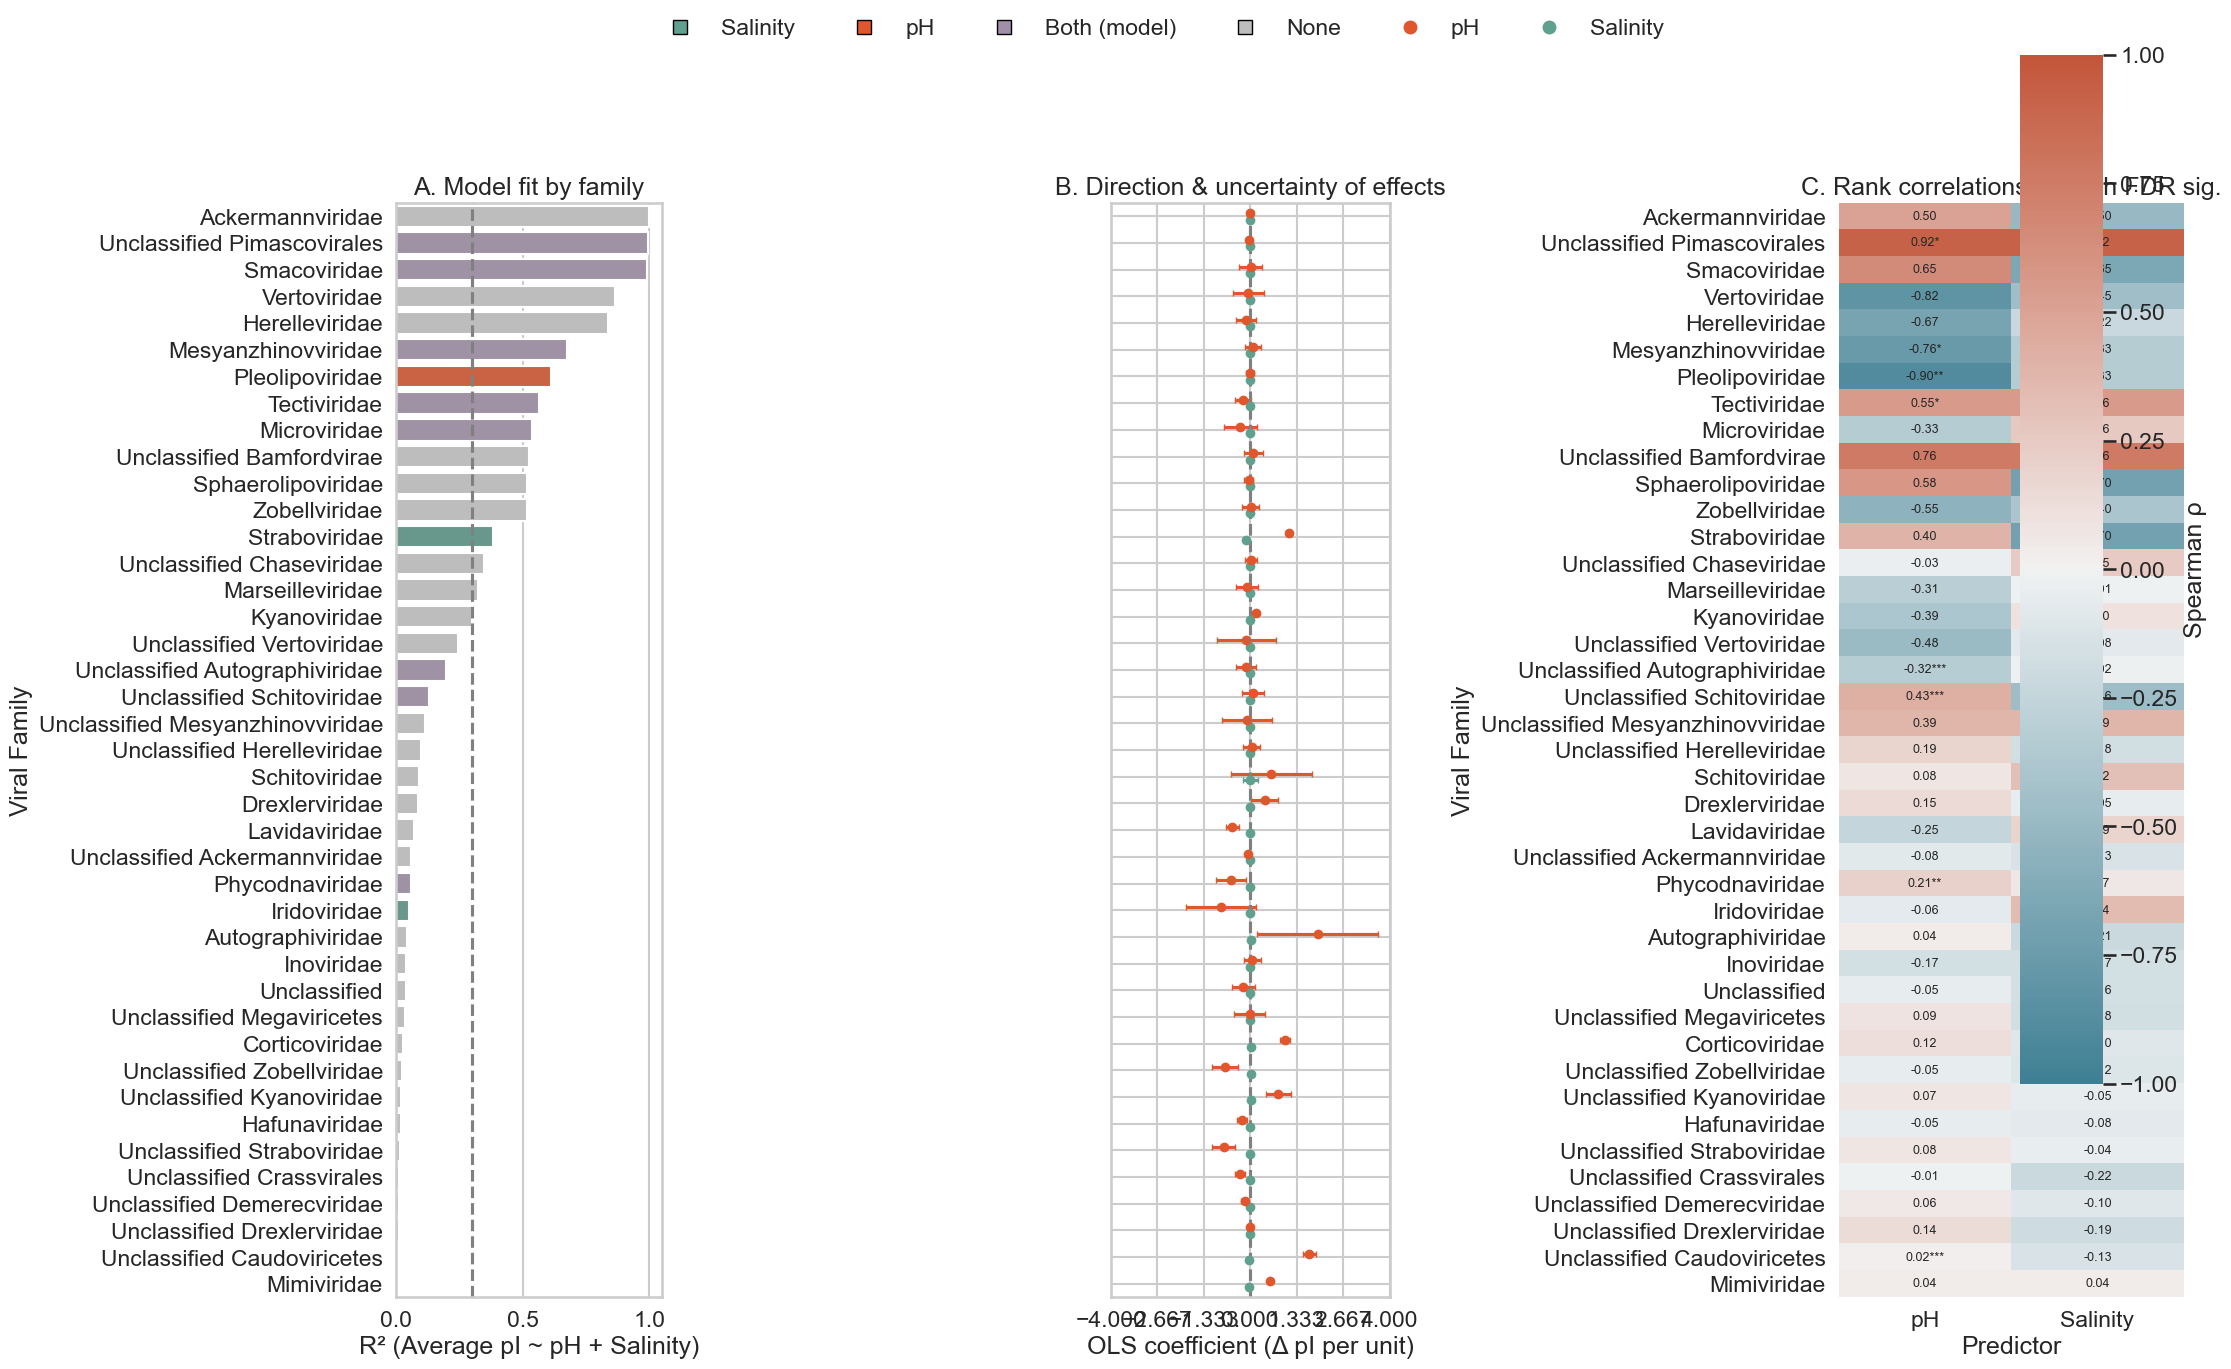

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.ticker import AutoMinorLocator
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from scipy.stats import spearmanr

sns.set_context("talk")
sns.set_style("whitegrid")

# -----------------------------------
# Helper functions
# -----------------------------------
def style_ticks(ax, x_minor=True, y_minor=True):
    ax.tick_params(axis='both', which='major', length=6, width=1.1, direction='out')
    ax.tick_params(axis='both', which='minor', length=3, width=0.9, direction='out')
    if x_minor:
        try: ax.xaxis.set_minor_locator(AutoMinorLocator())
        except: pass
    if y_minor:
        try: ax.yaxis.set_minor_locator(AutoMinorLocator())
        except: pass

def clamp_r2(x):
    if pd.isna(x): return 0.0
    return float(max(0.0, min(1.0, x)))

def add_fdr(df_in, pval_col, adj_col):
    out = df_in.copy()
    out[adj_col] = np.nan
    mask = out[pval_col].notna()
    if mask.any():
        out.loc[mask, adj_col] = multipletests(out.loc[mask, pval_col], method="fdr_bh")[1]
    return out

# -----------------------------------
# Load and prepare data
# -----------------------------------
df0 = filtered_All_envs_df_with_metadata.copy()
df0 = df0[["Average_pI", "pH", "Salinity", "family", "Environment_Bin"]].dropna().copy()
for c in ["Average_pI", "pH", "Salinity"]:
    df0[c] = pd.to_numeric(df0[c], errors="coerce")
df0 = df0.dropna().copy()
df0["family"] = df0["family"].astype(str)

# Multi-environment filtering
env_counts_by_family = df0.groupby("family")["Environment_Bin"].nunique()
multi_env_families = env_counts_by_family[env_counts_by_family >= 2].index
df_multi = df0[df0["family"].isin(multi_env_families)].copy()

if len(df_multi) and df_multi["family"].nunique() > 0:

    # Spearman correlations
    spearman_rows = []
    for fam, g in df_multi.groupby("family"):
        rho_sal, p_sal = spearmanr(g["Average_pI"], g["Salinity"]) if len(g) >= 2 else (np.nan, np.nan)
        rho_ph, p_ph = spearmanr(g["Average_pI"], g["pH"]) if len(g) >= 2 else (np.nan, np.nan)
        spearman_rows.append({
            "family": fam, "n": len(g),
            "rho_salinity": rho_sal, "pval_salinity": p_sal,
            "rho_pH": rho_ph, "pval_pH": p_ph
        })
    spearman_df = pd.DataFrame(spearman_rows)
    spearman_df = add_fdr(spearman_df, "pval_salinity", "adj_pval_salinity")
    spearman_df = add_fdr(spearman_df, "pval_pH", "adj_pval_pH")

    # OLS regression
    reg_rows, coef_rows = [], []
    for fam, g in df_multi.groupby("family"):
        r2_full, p_full = 0.0, np.nan
        beta_ph = beta_sal = se_ph = se_sal = p_ph = p_sal = np.nan
        if len(g) >= 3:
            try:
                X = sm.add_constant(g[["pH", "Salinity"]], has_constant="add")
                m = sm.OLS(g["Average_pI"], X).fit()
                r2_full = clamp_r2(m.rsquared)
                p_full = m.f_pvalue
                beta_ph = m.params.get("pH", np.nan)
                beta_sal = m.params.get("Salinity", np.nan)
                se_ph = m.bse.get("pH", np.nan)
                se_sal = m.bse.get("Salinity", np.nan)
                p_ph = m.pvalues.get("pH", np.nan)
                p_sal = m.pvalues.get("Salinity", np.nan)
            except: pass
        reg_rows.append({"family": fam, "n": len(g), "r2_full": r2_full, "pval_full": p_full})
        coef_rows += [
            {"family": fam, "term": "pH", "beta": beta_ph, "se": se_ph, "pval": p_ph},
            {"family": fam, "term": "Salinity", "beta": beta_sal, "se": se_sal, "pval": p_sal}
        ]
    reg_df = pd.DataFrame(reg_rows)
    coef_df = pd.DataFrame(coef_rows)
    reg_df = add_fdr(reg_df, "pval_full", "adj_pval_full")
    for term in ["pH", "Salinity"]:
        mask = (coef_df["term"] == term) & coef_df["pval"].notna()
        if mask.any():
            adj_vals = multipletests(coef_df.loc[mask, "pval"], method="fdr_bh")[1]
            coef_df.loc[mask, f"adj_pval_{term}"] = adj_vals

    summary_df = reg_df.merge(spearman_df, on=["family", "n"], how="outer")

    def driver_label(row):
        sal_sig = row.get("adj_pval_salinity", 1) < 0.05
        ph_sig = row.get("adj_pval_pH", 1) < 0.05
        full_sig = row.get("adj_pval_full", 1) < 0.05
        if full_sig: return "Both (model)"
        if sal_sig and ph_sig:
            rs = abs(row["rho_salinity"]) if pd.notna(row["rho_salinity"]) else -np.inf
            rp = abs(row["rho_pH"]) if pd.notna(row["rho_pH"]) else -np.inf
            return "Salinity" if rs >= rp else "pH"
        if sal_sig: return "Salinity"
        if ph_sig: return "pH"
        return "None"

    summary_df["driver"] = summary_df.apply(driver_label, axis=1)
    summary_df["sig_any"] = (
        (summary_df["adj_pval_salinity"].fillna(1) < 0.05) |
        (summary_df["adj_pval_pH"].fillna(1) < 0.05) |
        (summary_df["adj_pval_full"].fillna(1) < 0.05)
    )

    family_order = summary_df.sort_values("r2_full", ascending=False)["family"].tolist()
    coef_valid_by_family = coef_df.groupby("family")["beta"].apply(lambda s: np.isfinite(s).any())
    family_order_B = [f for f in family_order if coef_valid_by_family.get(f, False)]

    # -----------------------------------
    # Square Figure Layout
    # -----------------------------------
    fig = plt.figure(figsize=(21, 13), constrained_layout=True)
    gs = gridspec.GridSpec(nrows=1, ncols=3, figure=fig, width_ratios=[1, 1.05, 1.3])
    ax1, ax2, ax3 = fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2])

    # A: R² plot
    driver_palette = {"Salinity": "#60A08E", "pH": "#E0572D", "Both (model)": "#A08FA8", "None": "#bdbdbd"}
    plot_df = summary_df.copy()
    plot_df["family"] = pd.Categorical(plot_df["family"], categories=family_order, ordered=True)
    sns.barplot(data=plot_df, x="r2_full", y="family", hue="driver", dodge=False,
                palette=driver_palette, ax=ax1)
    ax1.axvline(0.3, ls="--", color="gray")
    ax1.set_title("A. Model fit by family")
    ax1.set_xlabel("R² (Average pI ~ pH + Salinity)")
    ax1.set_ylabel("Viral Family")
    if ax1.get_legend(): ax1.get_legend().remove()
    style_ticks(ax1)

    # B: Coefficients
    coef_plot = coef_df[coef_df["family"].isin(family_order_B)].copy()
    coef_plot["family"] = pd.Categorical(coef_plot["family"], categories=family_order, ordered=True)
    term_style = {"pH": {"color": "#E0572D", "marker": "o"}, "Salinity": {"color": "#60A08E", "marker": "o"}}
    ypos = {fam: i for i, fam in enumerate(family_order)}
    for term, grp in coef_plot.groupby("term"):
        y = grp["family"].map(ypos).astype(float)
        ci = 1.96 * grp["se"].fillna(0).values
        mask = np.isfinite(grp["beta"].values)
        ax2.errorbar(grp["beta"].values[mask],
                     (y + (0.12 if term == "pH" else -0.12)).values[mask],
                     xerr=ci[mask], fmt=term_style[term]["marker"],
                     color=term_style[term]["color"], ms=6, capsize=2.5)
    ax2.set_yticks(range(len(family_order)))
    ax2.set_yticklabels([""] * len(family_order))
    ax2.set_ylim(-0.5, len(family_order) - 0.5)
    ax2.axvline(0, ls="--", color="gray")
    ax2.set_title("B. Direction & uncertainty of effects")
    ax2.set_xlabel("OLS coefficient (Δ pI per unit)")
    ax2.set_xlim(-4.0, 4.0)
    ax2.set_xticks(np.linspace(-4, 4, 7))
    style_ticks(ax2)

    # C: Spearman heatmap with original divergent palette
    heat = summary_df.set_index("family")[["rho_pH", "rho_salinity"]].reindex(family_order)
    heat.columns = ["pH", "Salinity"]
    stars = pd.DataFrame(index=heat.index, columns=heat.columns, data="")
    for col in heat.columns:
        pval_col = f"adj_pval_{col}"
        if pval_col in summary_df.columns:
            sigs = summary_df.set_index("family")[pval_col].reindex(family_order)
            stars[col] = np.where(sigs < 0.001, "***",
                          np.where(sigs < 0.01, "**",
                          np.where(sigs < 0.05, "*", "")))
    sns.heatmap(heat, ax=ax3, cmap=sns.diverging_palette(220, 20, as_cmap=True),
                center=0, vmin=-1, vmax=1, cbar_kws={"label": "Spearman ρ"})
    for (i, j), val in np.ndenumerate(heat.values):
        if np.isfinite(val):
            ax3.text(j + 0.5, i + 0.5, f"{val:.2f}{stars.iloc[i, j]}", ha="center", va="center", fontsize=9)
    ax3.set_title("C. Rank correlations (ρ) with FDR sig.")
    ax3.set_xlabel("Predictor")
    ax3.set_ylabel("Viral Family")
    style_ticks(ax3)

    # Legend
    hA, lA = [], []
    for label, color in driver_palette.items():
        hA.append(plt.Line2D([0], [0], marker='s', color='none', label=label,
                             markerfacecolor=color, markersize=10))
    for term, style in term_style.items():
        hA.append(plt.Line2D([0], [0], marker=style["marker"], color=style["color"],
                             linestyle='none', label=term))
    fig.legend(hA, [h.get_label() for h in hA], loc="upper center", ncol=6, frameon=False, bbox_to_anchor=(0.5, 1.02))

    plt.tight_layout()
    plt.savefig("/Users/skoog/Desktop/regression.svg", format="svg", dpi=300, bbox_inches="tight", transparent=True)
    plt.show()

else:
    print("No multi-environment families found.")


In [44]:
host_ecology = {
    # Archaea-associated
    "Pleolipoviridae": "Halophilic Archaea",
    "Sphaerolipoviridae": "Halophilic Archaea",
    "Rudiviridae": "Thermophilic Archaea",
    "Tristromaviridae": "Thermophilic Archaea",
    "Hafunaviridae": "Halophilic Archaea",
    "Unclassified Vertoviridae": "Halophilic Archaea",
    "Vertoviridae": "Halophilic Archaea",
    # Giant viruses
    "Mimiviridae": "Eukarya (giant viruses)",
    "Marseilleviridae": "Eukarya (giant viruses)",
    "Phycodnaviridae": "Eukarya (giant viruses)",
    "Iridoviridae": "Eukarya (vertebrates/ invertebrates)",
    "Asfarviridae": "Eukarya (vertebrates/ invertebrates)",
    "Pimascovirales": "Eukarya (giant viruses)",
    "Megaviricetes": "Eukarya (giant viruses)",
    "Preplasmiviricota": "Eukaryota, Archaea, and Bacteria",
    # ssDNA & assorted
    "Circoviridae": "Eukarya (vertebrates/ invertebrates)",
    "Smacoviridae": "Eukarya (vertebrates/ invertebrates)",
    "Cressdnaviricota": "Eukarya (vertebrates/ invertebrates)",
    # Bacterial phages & others
    "Ackermannviridae": "Bacteria",
    "Autographiviridae": "Bacteria",
    "Casjensviridae": "Bacteria",
    "Corticoviridae": "Bacteria",
    "Demerecviridae": "Bacteria",
    "Drexlerviridae": "Bacteria",
    "Herelleviridae": "Bacteria",
    "Inoviridae": "Bacteria",
    "Mesyanzhinovviridae": "Bacteria",
    "Microviridae": "Bacteria",
    "Parvoviridae": "Eukarya (vertebrates/ invertebrates)",
    "Schitoviridae": "Bacteria",
    "Straboviridae": "Bacteria and Archaea",
    "Tectiviridae": "Bacteria",
    "Tombusviridae": "Eukarya (Plants)",
    "Zobellviridae": "Bacteria",
    "Kyanoviridae": "Bacteria and Archaea",
    "Lavidaviridae": "Virophage (GV-infected cells)",
    # Eukaryotic viruses
    "Herpesviridae": "Eukarya (vertebrates/ invertebrates)",
    "Adintoviridae": "Eukarya (vertebrates/ invertebrates)",
    # Unclassified / umbrella labels
    "Unclassified Ackermannviridae": "Bacteria",
    "Unclassified Algavirales": "Eukarya (giant viruses)",
    "Unclassified Autographiviridae": "Bacteria",
    "Unclassified Bamfordvirae": "Eukaryota, Archaea, and Bacteria",
    "Unclassified Casjensviridae": "Bacteria",
    "Unclassified Caudoviricetes": "Bacteria",
    "Unclassified Chaseviridae": "Bacteria",
    "Unclassified Crassvirales": "Bacteria",
    "Unclassified Cressdnaviricota": "Eukarya (vertebrates/ invertebrates)",
    "Unclassified Demerecviridae": "Bacteria",
    "Unclassified Drexlerviridae": "Bacteria",
    "Unclassified Guelinviridae": "Bacteria",
    "Unclassified Herelleviridae": "Bacteria",
    "Unclassified Imitervirales": "Eukarya (giant viruses)",
    "Unclassified Kyanoviridae": "Bacteria and Archaea",
    "Unclassified Mesyanzhinovviridae": "Bacteria",
    "Unclassified Peduoviridae": "Bacteria",
    "Unclassified Pimascovirales": "Eukarya (giant viruses)",
    "Unclassified Preplasmiviricota": "Eukaryota, Archaea, and Bacteria",
    "Unclassified Priklausovirales": "Virophage (GV-infected cells)",
    "Unclassified Rountreeviridae": "Bacteria",
    "Unclassified Schitoviridae": "Bacteria",
    "Unclassified Straboviridae": "Bacteria",
    "Unclassified Tubulavirales": "Bacteria",
    "Unclassified Zobellviridae": "Bacteria",
    "Unclassified Megaviricetes": "Eukarya (giant viruses)",
}



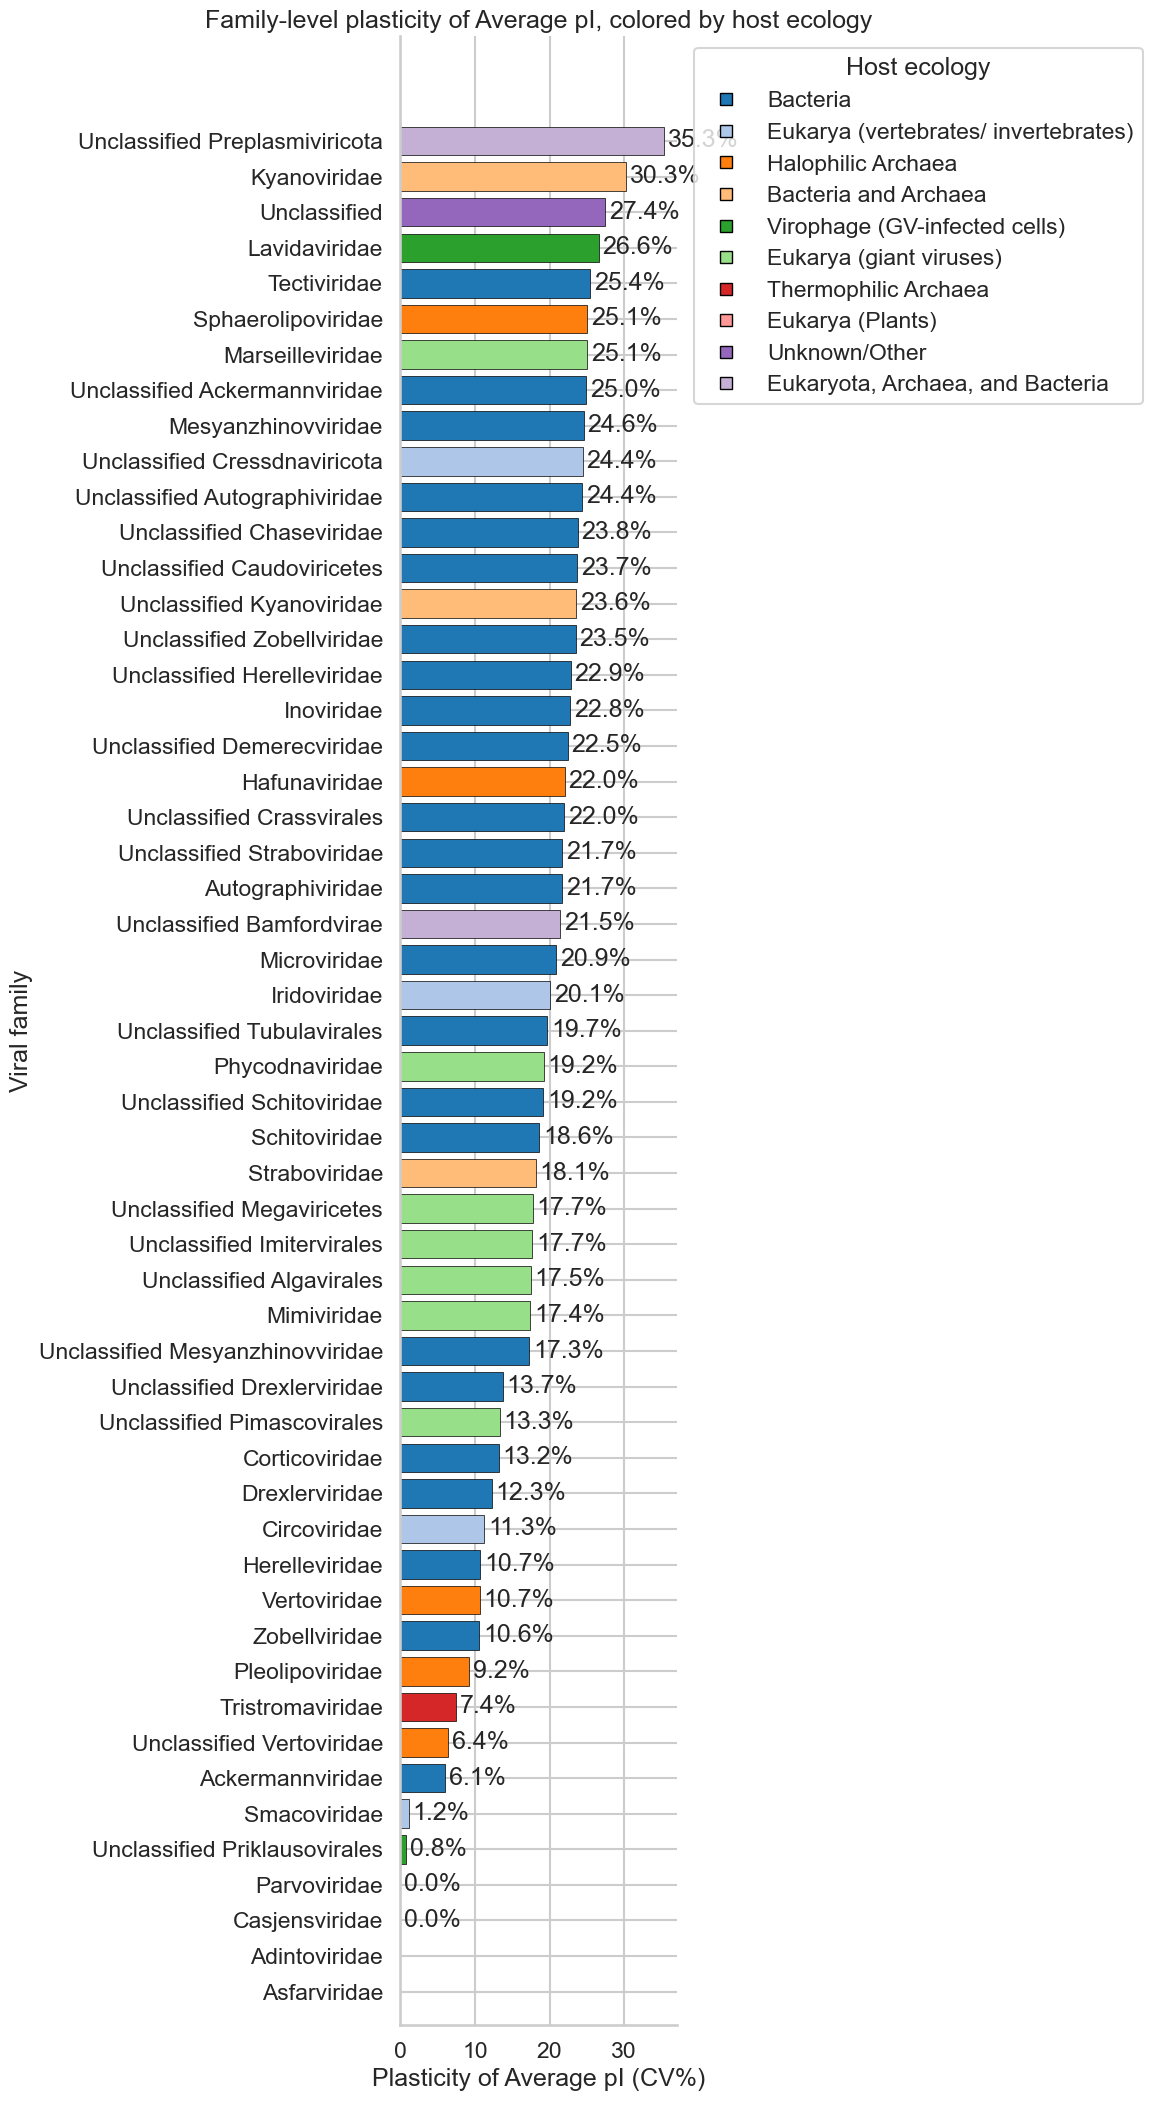

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


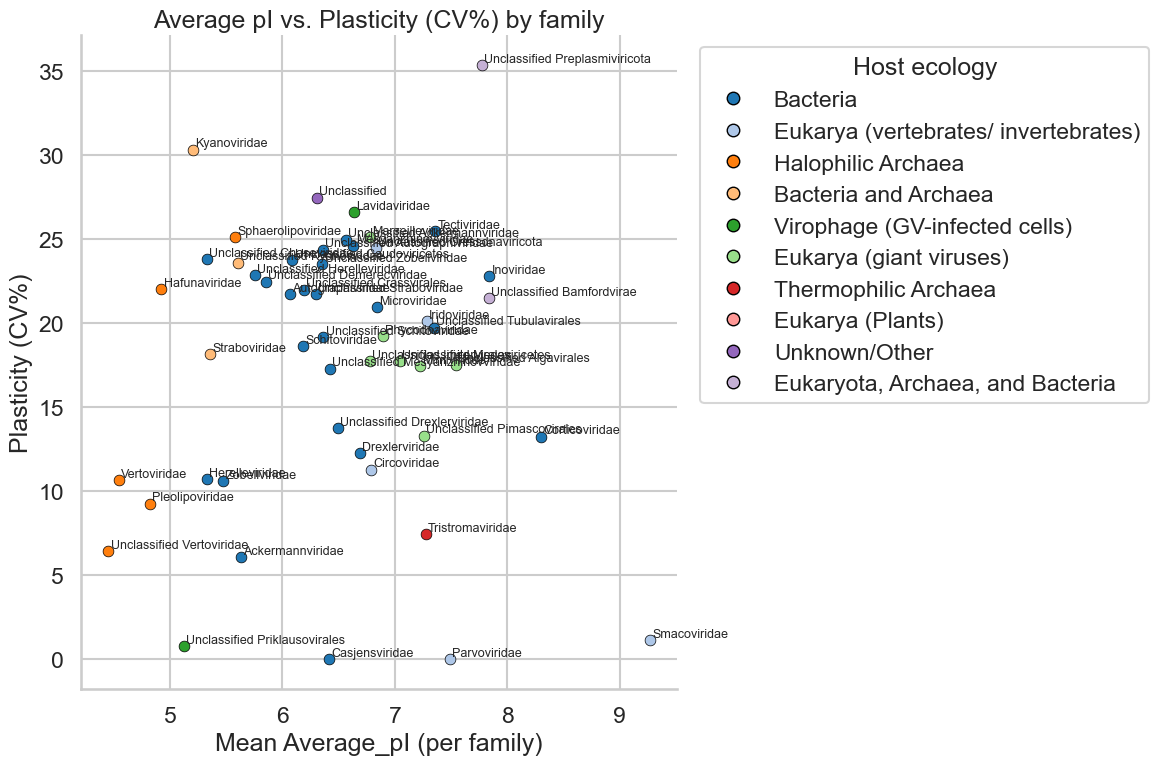

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0) starting point ---
df = filtered_All_envs_df_with_metadata.copy()

# Optional: trim/clean family strings
df["family"] = df["family"].astype(str).str.strip()
 

# --- 2) compute plasticity (CV%) of Average_pI per family ---
# Optionally, restrict to Present==1 if you want only detected families
# df = df[df["Present"] == 1]

agg = (
    df.dropna(subset=["Average_pI", "family"])
      .groupby("family", as_index=False)
      .agg(
          n=("Average_pI", "size"),
          mean_pI=("Average_pI", "mean"),
          sd_pI=("Average_pI", "std")
      )
)

# Avoid division-by-zero; CV% = 100 * sd / mean
agg["CV_percent"] = np.where(
    agg["mean_pI"].abs() > 0,
    100.0 * agg["sd_pI"] / agg["mean_pI"].abs(),
    np.nan
)

# Attach host ecology label; default to "Unknown/Other"
agg["Host_ecology"] = agg["family"].map(host_ecology).fillna("Unknown/Other")

# --- 3) plotting options ---
# (A) Bar plot of CV% by family, colored by Host_ecology, labels shown
sns.set_context("talk")
palette = sns.color_palette("tab20", agg["Host_ecology"].nunique())
host_to_color = dict(zip(agg["Host_ecology"].unique(), palette))

plot_df = agg.sort_values("CV_percent", ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, max(6, 0.35 * len(plot_df))))
bars = ax.barh(
    y=plot_df["family"],
    width=plot_df["CV_percent"],
    color=plot_df["Host_ecology"].map(host_to_color),
    edgecolor="black",
    linewidth=0.5
)

# Value labels at end of bars
for i, (w, y) in enumerate(zip(plot_df["CV_percent"], plot_df["family"])):
    if pd.notnull(w):
        ax.text(w + 0.5, i, f"{w:.1f}%", va="center")

ax.set_xlabel("Plasticity of Average pI (CV%)")
ax.set_ylabel("Viral family")
ax.invert_yaxis()  # highest CV at top
ax.set_title("Family-level plasticity of Average pI, colored by host ecology")

# Legend
handles = [
    plt.Line2D([0],[0], marker="s", linestyle="",
               markerfacecolor=host_to_color[h], markeredgecolor="black", label=h)
    for h in host_to_color
]
ax.legend(handles=handles, title="Host ecology", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)

sns.despine()
plt.tight_layout()
plt.show()

# --- 3B) (optional) label-per-point scatter: mean pI vs CV% colored by host, family text labels ---
fig, ax = plt.subplots(figsize=(12, 8))
for _, r in agg.iterrows():
    ax.scatter(r["mean_pI"], r["CV_percent"], s=60, color=host_to_color.get(r["Host_ecology"], "gray"), edgecolor="black", linewidth=0.5)
    ax.text(r["mean_pI"] + 0.02, r["CV_percent"] + 0.2, r["family"], fontsize=9)

ax.set_xlabel("Mean Average_pI (per family)")
ax.set_ylabel("Plasticity (CV%)")
ax.set_title("Average pI vs. Plasticity (CV%) by family")
# build legend from host colors
handles = [
    plt.Line2D([0],[0], marker="o", linestyle="", markerfacecolor=host_to_color[h], markeredgecolor="black", label=h)
    for h in host_to_color
]
ax.legend(handles=handles, title="Host ecology", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)
sns.despine()
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


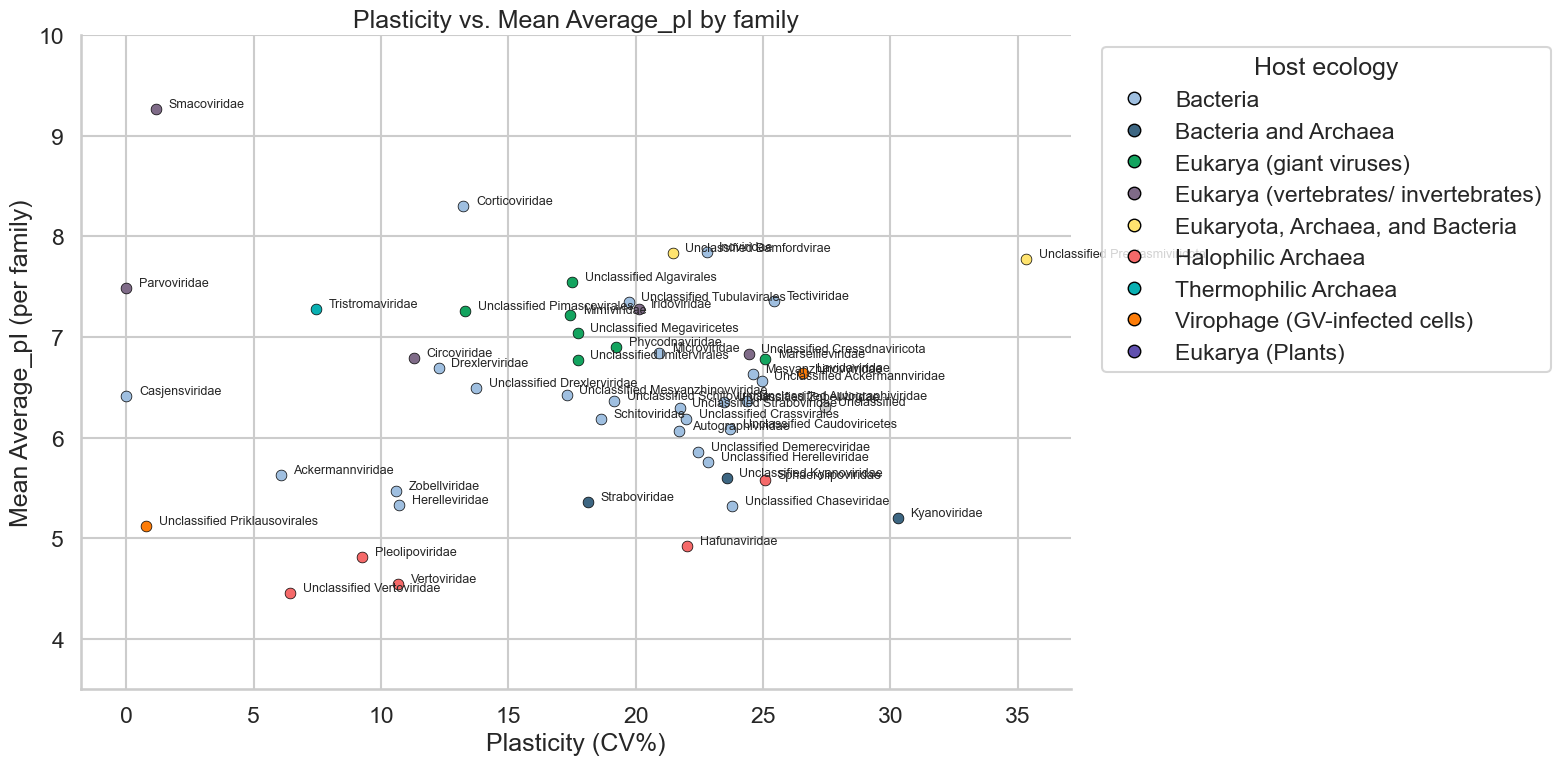

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0) starting point ---
df = filtered_All_envs_df_with_metadata.copy()

# Optional: trim/clean family strings
df["family"] = df["family"].astype(str).str.strip()

# --- 1) compute plasticity (CV%) of Average_pI per family ---
agg = (
    df.dropna(subset=["Average_pI", "family"])
      .groupby("family", as_index=False)
      .agg(
          n=("Average_pI", "size"),
          mean_pI=("Average_pI", "mean"),
          sd_pI=("Average_pI", "std")
      )
)

# Avoid division-by-zero; CV% = 100 * sd / mean
agg["CV_percent"] = np.where(
    agg["mean_pI"].abs() > 0,
    100.0 * agg["sd_pI"] / agg["mean_pI"].abs(),
    np.nan
)

# Attach host ecology label; default to "Unknown/Other"
agg["Host_ecology"] = agg["family"].map(host_ecology).fillna("Unknown/Other")

# --- 2) define custom colors ---
custom_colors = {
    "Bacteria": "#9FBFE0",
    "Bacteria and Archaea": "#3D6682",
    "Eukarya (giant viruses)": "#13A45F",
    "Eukarya (vertebrates/ invertebrates)": "#7F6B88",
    "Eukaryota, Archaea, and Bacteria": "#FFE46F",
    "Halophilic Archaea": "#F56969",
    "Thermophilic Archaea": "#09B0B2",
    "Virophage (GV-infected cells)": "#FD7C08",
    "Eukarya (Plants)": "#6050AF"
}

# --- 3) scatterplot (flipped axes, wider figure) ---
fig, ax = plt.subplots(figsize=(16, 8))

for _, r in agg.iterrows():
    color = custom_colors.get(r["Host_ecology"], "lightgrey")
    ax.scatter(
        r["CV_percent"], r["mean_pI"], 
        s=60, 
        color=color, 
        edgecolor="black", 
        linewidth=0.5
    )
    ax.text(
        r["CV_percent"] + 0.5, 
        r["mean_pI"] + 0.02, 
        r["family"], 
        fontsize=9
    )

ax.set_xlabel("Plasticity (CV%)")
ax.set_ylabel("Mean Average_pI (per family)")
ax.set_ylim(3.5, 10)
ax.set_title("Plasticity vs. Mean Average_pI by family")

# Legend built from custom colors
handles = [
    plt.Line2D([0],[0], marker="o", linestyle="", 
               markerfacecolor=custom_colors[h], markeredgecolor="black", label=h)
    for h in custom_colors
]
ax.legend(handles=handles, title="Host ecology", 
          bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)

sns.despine()
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8733 missing from current font.
  font.set_text(s, 0, flags=flags)


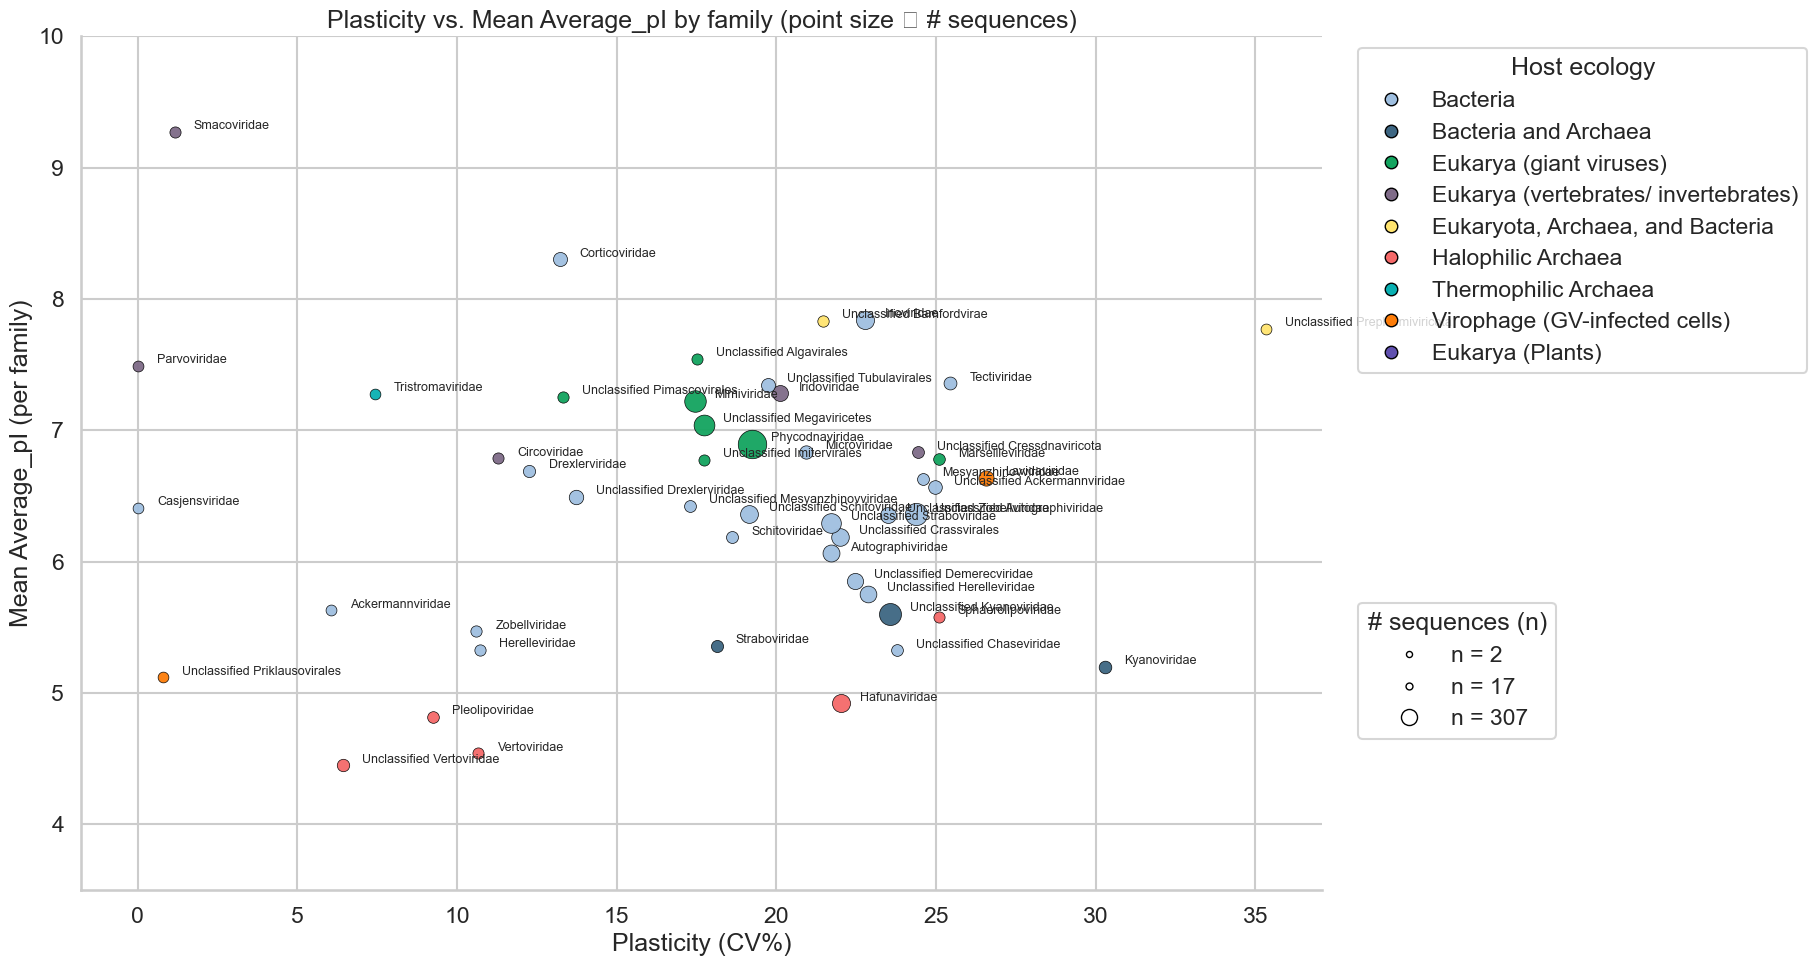

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0) starting point ---
df = filtered_All_envs_df_with_metadata.copy()

# Clean family strings
df["family"] = df["family"].astype(str).str.strip()

# Drop unwanted families: "Unclassified" and "Unclassified Caudoviricetes" (case-insensitive)
drop_set = {"unclassified", "unclassified caudoviricetes"}
df = df[~df["family"].str.casefold().isin(drop_set)]

# --- 1) compute plasticity (CV%) of Average_pI per family ---
agg = (
    df.dropna(subset=["Average_pI", "family"])
      .groupby("family", as_index=False)
      .agg(
          n=("Average_pI", "size"),
          mean_pI=("Average_pI", "mean"),
          sd_pI=("Average_pI", "std")
      )
)

# Avoid division-by-zero; CV% = 100 * sd / mean
agg["CV_percent"] = np.where(
    agg["mean_pI"].abs() > 0,
    100.0 * agg["sd_pI"] / agg["mean_pI"].abs(),
    np.nan
)

# Attach host ecology label; default to "Unknown/Other"
agg["Host_ecology"] = agg["family"].map(host_ecology).fillna("Unknown/Other")

# Keep only rows with valid plotting values
agg_plot = agg.dropna(subset=["CV_percent", "mean_pI"]).copy()

# --- 2) custom colors you provided ---
custom_colors = {
    "Bacteria": "#9FBFE0",
    "Bacteria and Archaea": "#3D6682",
    "Eukarya (giant viruses)": "#13A45F",
    "Eukarya (vertebrates/ invertebrates)": "#7F6B88",
    "Eukaryota, Archaea, and Bacteria": "#FFE46F",
    "Halophilic Archaea": "#F56969",
    "Thermophilic Archaea": "#09B0B2",
    "Virophage (GV-infected cells)": "#FD7C08",
    "Eukarya (Plants)": "#6050AF"
}

def color_for(host):
    return custom_colors.get(host, "lightgrey")

# --- 3) size by number of sequences (n) ---
# Map n -> point size (pixels^2). Tune the min/max to taste.
n_min, n_max = agg_plot["n"].min(), agg_plot["n"].max()
# Avoid zero range
if n_min == n_max:
    agg_plot["size"] = 200.0
else:
    agg_plot["size"] = np.interp(agg_plot["n"], [n_min, n_max], [60.0, 420.0])

# --- 4) scatterplot (CV% on x, mean pI on y), wider figure ---
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(16, 10))

for _, r in agg_plot.iterrows():
    ax.scatter(
        r["CV_percent"], r["mean_pI"],
        s=r["size"],
        color=color_for(r["Host_ecology"]),
        edgecolor="black",
        linewidth=0.5,
        alpha=0.95
    )
    # small offsets for labels to reduce overlap
    ax.text(
        r["CV_percent"] + 0.6,
        r["mean_pI"] + 0.02,
        r["family"],
        fontsize=9
    )

ax.set_xlabel("Plasticity (CV%)")
ax.set_ylabel("Mean Average_pI (per family)")
ax.set_ylim(3.5, 10)
ax.set_title("Plasticity vs. Mean Average_pI by family (point size ∝ # sequences)")

# --- legend for colors (host ecology) ---
color_handles = [
    plt.Line2D([0],[0], marker="o", linestyle="",
               markerfacecolor=hexcol, markeredgecolor="black", label=name)
    for name, hexcol in custom_colors.items()
]
legend1 = ax.legend(handles=color_handles, title="Host ecology",
                    bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)

# --- legend for sizes (n) ---
# Pick representative counts (min, median, max)
n_vals = agg_plot["n"].to_numpy()
rep_counts = np.unique([n_min, int(np.median(n_vals)), n_max])
rep_sizes = np.interp(rep_counts, [n_min, n_max], [60.0, 420.0])

size_handles = [
    plt.Line2D([0],[0], marker="o", linestyle="",
               markersize=np.sqrt(s/np.pi),  # translate area back to radius-ish for legend
               markerfacecolor="white", markeredgecolor="black",
               label=f"n = {int(c)}")
    for s, c in zip(rep_sizes, rep_counts)
]
legend2 = ax.legend(handles=size_handles, title="# sequences (n)",
                    bbox_to_anchor=(1.02, 0.35), loc="upper left", frameon=True)
ax.add_artist(legend1)  # keep both legends

sns.despine()
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 8733 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8733 missing from current font.
  font.set_text(s, 0, flags=flags)


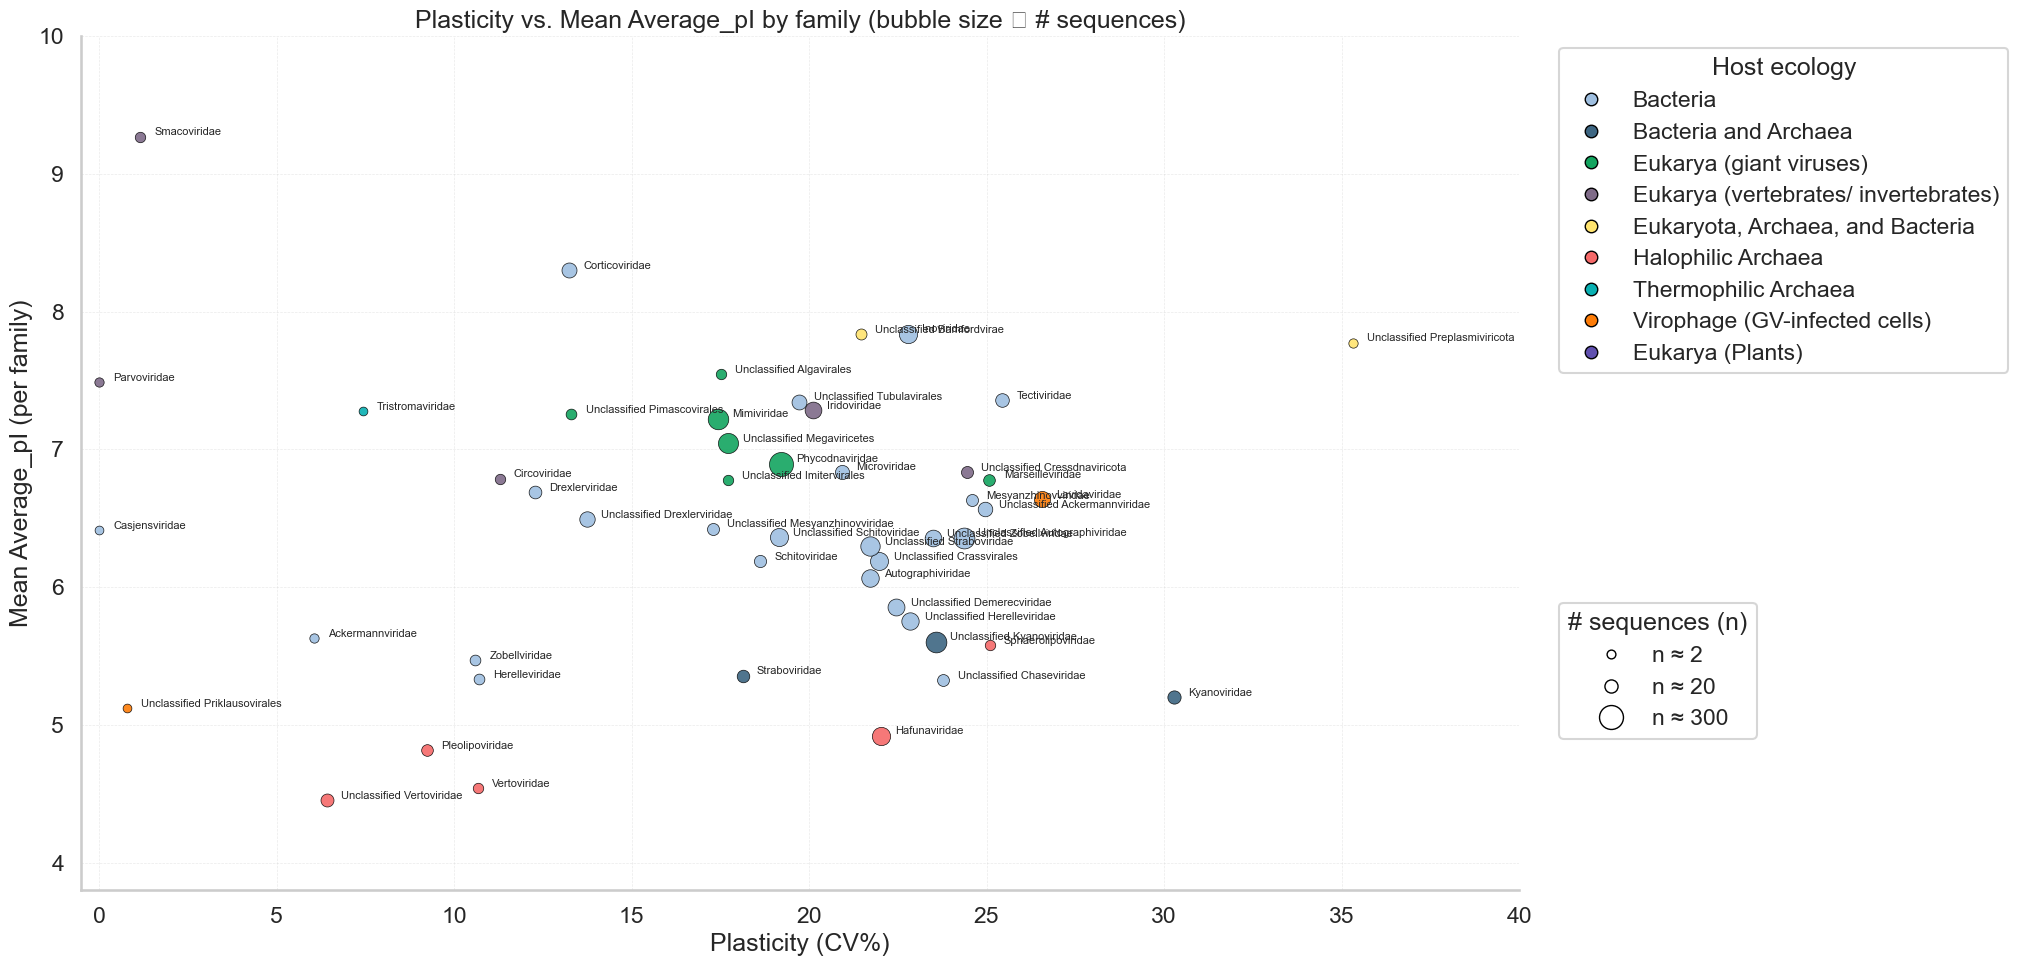

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# --- 0) starting point ---
df = filtered_All_envs_df_with_metadata.copy()

# Clean family strings
df["family"] = df["family"].astype(str).str.strip()

# Drop unwanted families
drop_set = {"unclassified", "unclassified caudoviricetes"}
df = df[~df["family"].str.casefold().isin(drop_set)]

# --- 1) compute per-family stats ---
agg = (
    df.dropna(subset=["Average_pI", "family"])
      .groupby("family", as_index=False)
      .agg(
          n=("Average_pI", "size"),
          mean_pI=("Average_pI", "mean"),
          sd_pI=("Average_pI", "std")
      )
)

agg["CV_percent"] = np.where(
    agg["mean_pI"].abs() > 0,
    100.0 * agg["sd_pI"] / agg["mean_pI"].abs(),
    np.nan
)

agg["Host_ecology"] = agg["family"].map(host_ecology).fillna("Unknown/Other")
agg_plot = agg.dropna(subset=["CV_percent", "mean_pI"]).copy()

# --- 2) custom colors ---
custom_colors = {
    "Bacteria": "#9FBFE0",
    "Bacteria and Archaea": "#3D6682",
    "Eukarya (giant viruses)": "#13A45F",
    "Eukarya (vertebrates/ invertebrates)": "#7F6B88",
    "Eukaryota, Archaea, and Bacteria": "#FFE46F",
    "Halophilic Archaea": "#F56969",
    "Thermophilic Archaea": "#09B0B2",
    "Virophage (GV-infected cells)": "#FD7C08",
    "Eukarya (Plants)": "#6050AF"
}
def color_for(host):
    return custom_colors.get(host, "lightgrey")

# --- 3) bubble size scaling ---
n_vals = agg_plot["n"].to_numpy()
n_min, n_max = n_vals.min(), n_vals.max()
size_min, size_max = 40.0, 300.0  # smaller bubbles

if n_min == n_max:
    agg_plot["size"] = size_min
else:
    agg_plot["size"] = np.interp(
        np.sqrt(n_vals),
        [math.sqrt(n_min), math.sqrt(n_max)],
        [size_min, size_max]
    )

# --- 4) plot ---
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(18, 10))

for _, r in agg_plot.iterrows():
    ax.scatter(
        r["CV_percent"], r["mean_pI"],
        s=r["size"],
        color=color_for(r["Host_ecology"]),
        edgecolor="black",
        linewidth=0.5,
        alpha=0.9,
        zorder=2
    )
    ax.text(
        r["CV_percent"] + 0.4,
        r["mean_pI"] + 0.01,
        r["family"],
        fontsize=8,
        zorder=3
    )

ax.set_xlabel("Plasticity (CV%)")
ax.set_ylabel("Mean Average_pI (per family)")
ax.set_ylim(3.8, 10)
ax.set_xlim(-0.5, 40)

ax.set_title("Plasticity vs. Mean Average_pI by family (bubble size ∝ # sequences)")
ax.grid(True, axis="both", linestyle="--", linewidth=0.5, alpha=0.4, zorder=0)

# --- 5) legends ---
# Color legend
color_handles = [
    plt.Line2D([0],[0], marker="o", linestyle="",
               markerfacecolor=hexcol, markeredgecolor="black", label=name)
    for name, hexcol in custom_colors.items()
]
legend1 = ax.legend(handles=color_handles, title="Host ecology",
                    bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)

# Size legend (now correctly scaled)
def nice_round(x):
    if x <= 0:
        return 1
    p = int(np.floor(np.log10(x)))
    base = 10**p
    return int(round(x / base) * base)

if n_min == n_max:
    ref_counts = [int(n_min)]
else:
    ref_counts = [n_min, int(np.median(n_vals)), n_max]
    ref_counts = sorted(set(nice_round(int(c)) for c in ref_counts))

ref_sizes = np.interp(
    np.sqrt(ref_counts),
    [math.sqrt(n_min), math.sqrt(n_max)],
    [size_min, size_max]
)

size_handles = [
    plt.Line2D([0],[0], marker="o", linestyle="",
               markersize=np.sqrt(s),  # ✅ matches scatter sizing
               markerfacecolor="white", markeredgecolor="black",
               label=f"n ≈ {c}")
    for s, c in zip(ref_sizes, ref_counts)
]
legend2 = ax.legend(handles=size_handles, title="# sequences (n)",
                    bbox_to_anchor=(1.02, 0.35), loc="upper left", frameon=True)
ax.add_artist(legend1)

sns.despine()
plt.tight_layout()
plt.savefig("/Users/skoog/Desktop/cv_all3.svg", format="svg", dpi=300, bbox_inches="tight", transparent=True)

plt.show()


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 8733 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8733 missing from current font.
  font.set_text(s, 0, flags=flags)


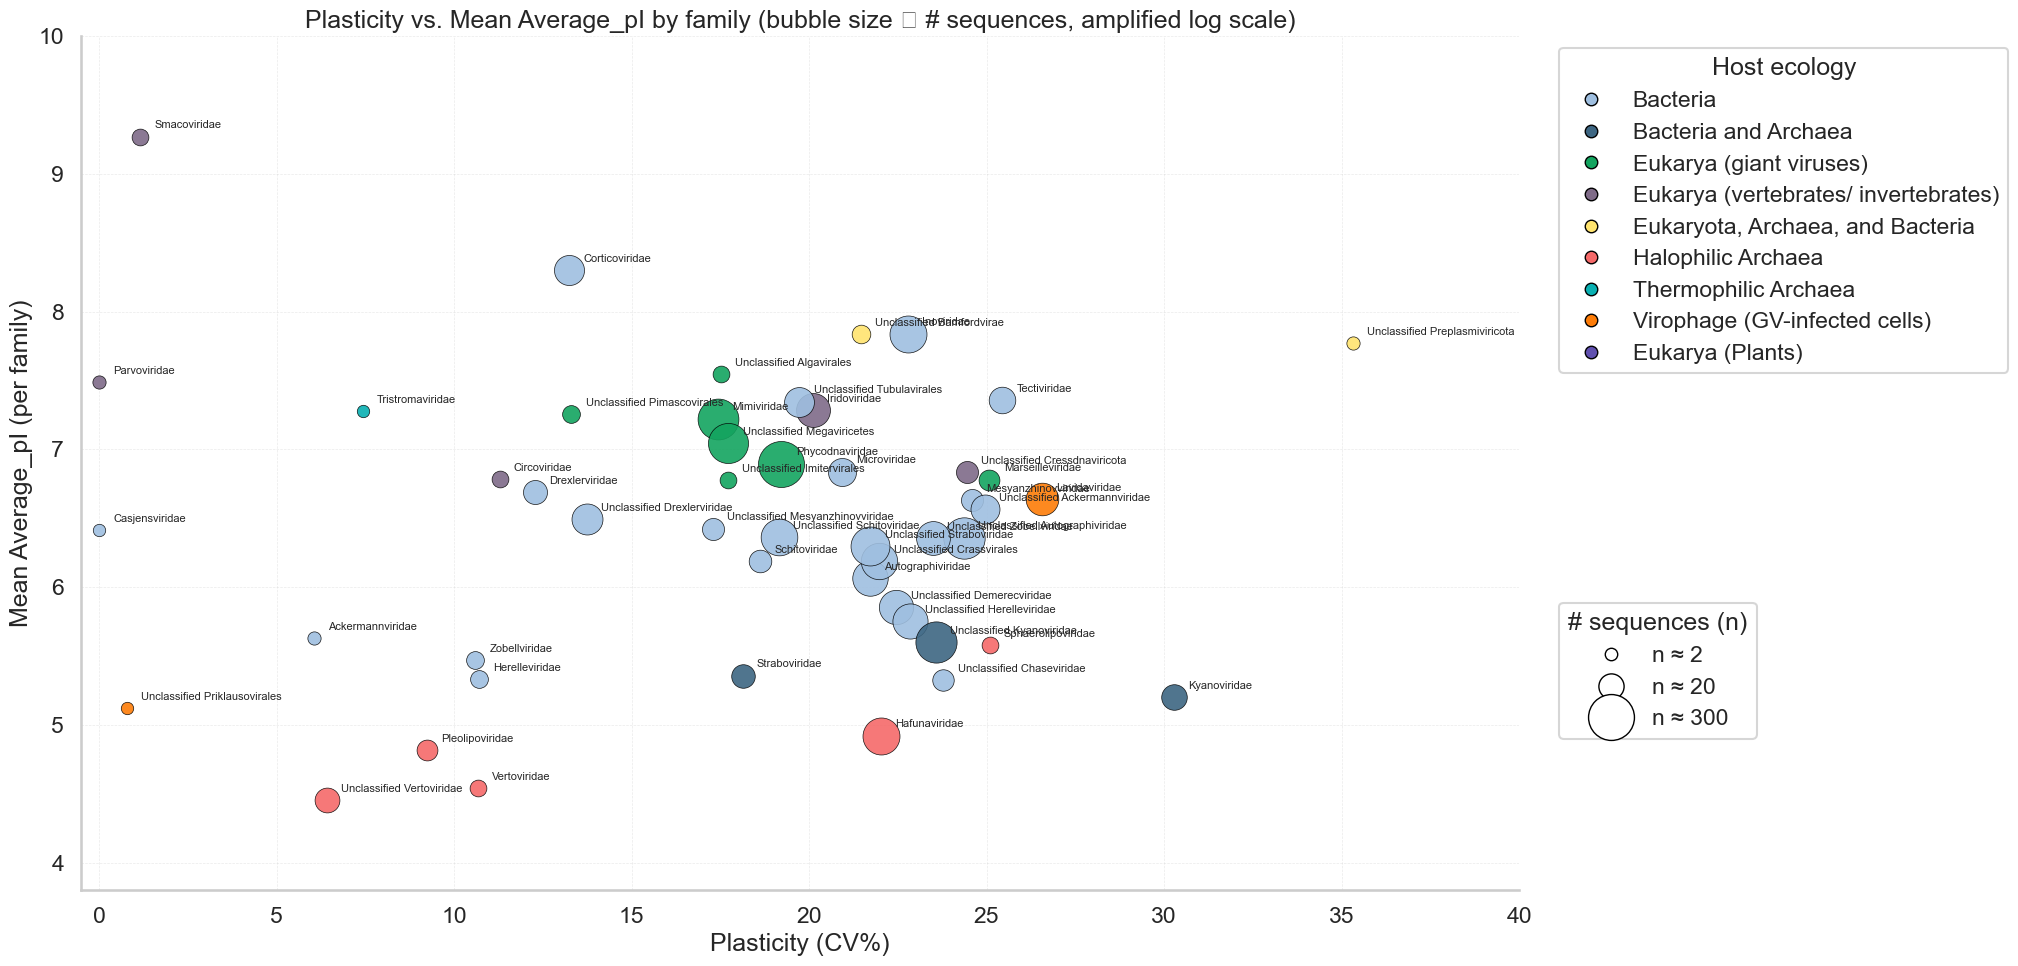

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# --- 0) starting point ---
df = filtered_All_envs_df_with_metadata.copy()

# Clean family strings
df["family"] = df["family"].astype(str).str.strip()

# Drop unwanted families
drop_set = {"unclassified", "unclassified caudoviricetes"}
df = df[~df["family"].str.casefold().isin(drop_set)]

# --- 1) compute per-family stats ---
agg = (
    df.dropna(subset=["Average_pI", "family"])
      .groupby("family", as_index=False)
      .agg(
          n=("Average_pI", "size"),
          mean_pI=("Average_pI", "mean"),
          sd_pI=("Average_pI", "std")
      )
)

agg["CV_percent"] = np.where(
    agg["mean_pI"].abs() > 0,
    100.0 * agg["sd_pI"] / agg["mean_pI"].abs(),
    np.nan
)

agg["Host_ecology"] = agg["family"].map(host_ecology).fillna("Unknown/Other")
agg_plot = agg.dropna(subset=["CV_percent", "mean_pI"]).copy()

# --- 2) custom colors ---
custom_colors = {
    "Bacteria": "#9FBFE0",
    "Bacteria and Archaea": "#3D6682",
    "Eukarya (giant viruses)": "#13A45F",
    "Eukarya (vertebrates/ invertebrates)": "#7F6B88",
    "Eukaryota, Archaea, and Bacteria": "#FFE46F",
    "Halophilic Archaea": "#F56969",
    "Thermophilic Archaea": "#09B0B2",
    "Virophage (GV-infected cells)": "#FD7C08",
    "Eukarya (Plants)": "#6050AF"
}
def color_for(host):
    return custom_colors.get(host, "lightgrey")

# --- 3) bubble size scaling (Amplified LOG scale) ---
n_vals = agg_plot["n"].to_numpy(dtype=float)
n_min, n_max = n_vals.min(), n_vals.max()

# visual range + amplification power (gamma>1 increases separation)
size_min, size_max = 80.0, 1100.0
gamma = 1.8  # try 1.5–2.2 for more/less dramatic separation

if n_min == n_max:
    sizes = np.full_like(n_vals, size_min)
else:
    # normalize on log10 scale to 0..1
    t = (np.log10(n_vals) - np.log10(n_min)) / (np.log10(n_max) - np.log10(n_min))
    t = np.clip(t, 0, 1)
    t_amp = t**gamma
    sizes = size_min + (size_max - size_min) * t_amp

agg_plot["size"] = sizes

# --- 4) plot ---
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(18, 10))

for _, r in agg_plot.iterrows():
    ax.scatter(
        r["CV_percent"], r["mean_pI"],
        s=r["size"],
        color=color_for(r["Host_ecology"]),
        edgecolor="black",
        linewidth=0.5,
        alpha=0.9,
        zorder=2
    )
    ax.text(
        r["CV_percent"] + 0.4,
        r["mean_pI"] + 0.06,
        r["family"],
        fontsize=8,
        zorder=3
    )

ax.set_xlabel("Plasticity (CV%)")
ax.set_ylabel("Mean Average_pI (per family)")
ax.set_ylim(3.8, 10)
ax.set_xlim(-0.5, 40)
ax.set_title("Plasticity vs. Mean Average_pI by family (bubble size ∝ # sequences, amplified log scale)")
ax.grid(True, axis="both", linestyle="--", linewidth=0.5, alpha=0.4, zorder=0)

# --- 5) legends ---
# Color legend
color_handles = [
    plt.Line2D([0],[0], marker="o", linestyle="",
               markerfacecolor=hexcol, markeredgecolor="black", label=name)
    for name, hexcol in custom_colors.items()
]
legend1 = ax.legend(handles=color_handles, title="Host ecology",
                    bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)

# Size legend (use the same amplified mapping)
def nice_round(x):
    if x <= 0:
        return 1
    p = int(np.floor(np.log10(x)))
    base = 10**p
    return int(round(x / base) * base)

ref_counts = sorted(set(nice_round(int(x)) for x in [n_min, np.median(n_vals), n_max]))
if len(ref_counts) == 1:
    ref_sizes = [size_min]
else:
    t_ref = (np.log10(ref_counts) - np.log10(n_min)) / (np.log10(n_max) - np.log10(n_min))
    t_ref = np.clip(t_ref, 0, 1)
    t_ref = t_ref**gamma
    ref_sizes = size_min + (size_max - size_min) * t_ref

size_handles = [
    plt.Line2D([0],[0], marker="o", linestyle="",
               markersize=np.sqrt(s),  # convert points² → points
               markerfacecolor="white", markeredgecolor="black",
               label=f"n ≈ {c}")
    for s, c in zip(ref_sizes, ref_counts)
]
legend2 = ax.legend(handles=size_handles, title="# sequences (n)",
                    bbox_to_anchor=(1.02, 0.35), loc="upper left", frameon=True)
ax.add_artist(legend1)

sns.despine()
plt.tight_layout()
plt.savefig("/Users/skoog/Desktop/cv_all3.svg", format="svg", dpi=300, bbox_inches="tight", transparent=True)

plt.show()


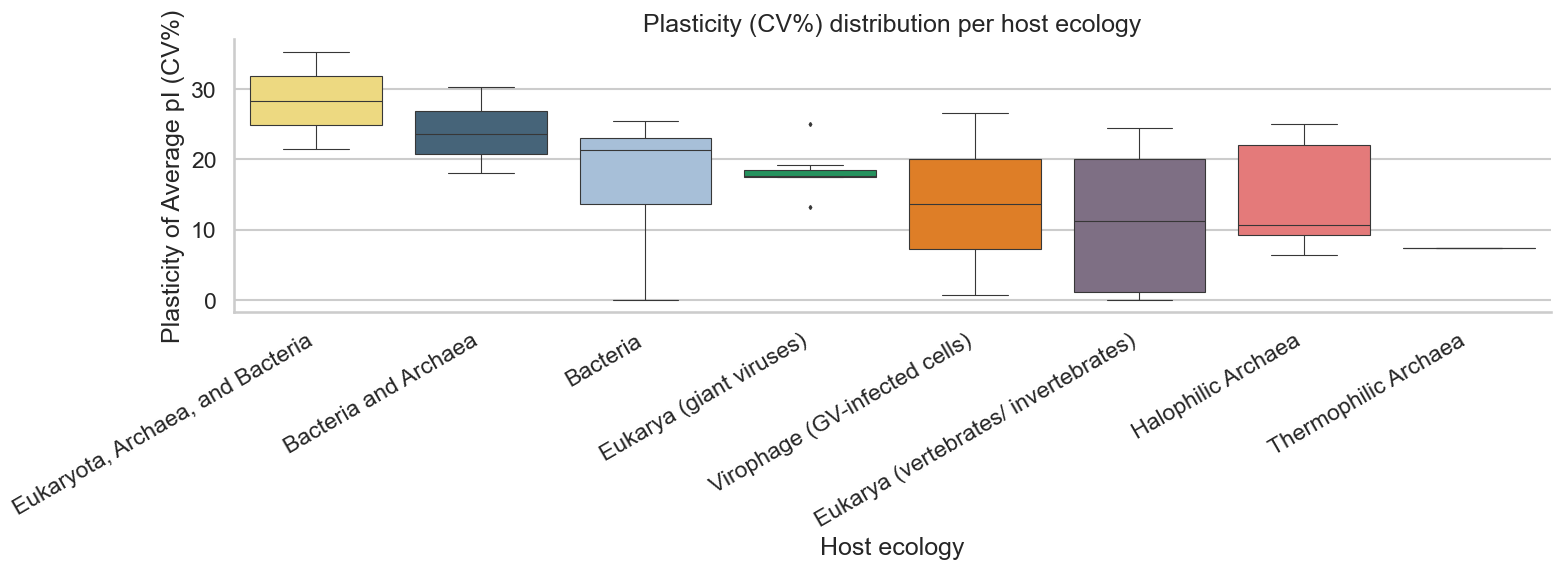

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0) starting point ---
df = filtered_All_envs_df_with_metadata.copy()

# Clean family strings
df["family"] = df["family"].astype(str).str.strip()

# Drop unwanted families (case-insensitive)
drop_set = {"unclassified", "unclassified caudoviricetes"}
df = df[~df["family"].str.casefold().isin(drop_set)]

# --- 1) attach host ecology ---
df["Host_ecology"] = df["family"].map(host_ecology).fillna("Unknown/Other")

# --- 2) compute per-family plasticity (CV%) of Average_pI ---
agg = (
    df.dropna(subset=["Average_pI", "family"])
      .groupby("family", as_index=False)
      .agg(
          mean_pI=("Average_pI", "mean"),
          sd_pI=("Average_pI", "std"),
          Host_ecology=("Host_ecology", "first")
      )
)
agg["CV_percent"] = np.where(
    agg["mean_pI"].abs() > 0,
    100.0 * agg["sd_pI"] / agg["mean_pI"].abs(),
    np.nan
)
agg = agg.dropna(subset=["CV_percent"])

# --- 3) custom colors ---
custom_colors = {
    "Bacteria": "#9FBFE0",
    "Bacteria and Archaea": "#3D6682",
    "Eukarya (giant viruses)": "#13A45F",
    "Eukarya (vertebrates/ invertebrates)": "#7F6B88",
    "Eukaryota, Archaea, and Bacteria": "#FFE46F",
    "Halophilic Archaea": "#F56969",
    "Thermophilic Archaea": "#09B0B2",
    "Virophage (GV-infected cells)": "#FD7C08",
    "Eukarya (Plants)": "#6050AF",
    "Unknown/Other": "lightgrey",
}

# Restrict palette to categories present
present_hosts = agg["Host_ecology"].dropna().unique().tolist()
palette = {k: v for k, v in custom_colors.items() if k in present_hosts}

# Order host groups by median CV% (descending)
host_order = (
    agg.groupby("Host_ecology")["CV_percent"]
       .median()
       .sort_values(ascending=False)
       .index
)

# --- 4) box plot only ---
sns.set_context("talk")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(
    data=agg,
    x="Host_ecology",
    y="CV_percent",
    order=host_order,
    palette=palette,
    showcaps=True,
    fliersize=2,
    linewidth=0.8
)

# Labels & styling
ax.set_xlabel("Host ecology")
ax.set_ylabel("Plasticity of Average pI (CV%)")
ax.set_title("Plasticity (CV%) distribution per host ecology")
plt.xticks(rotation=30, ha="right")

sns.despine()
plt.tight_layout()
plt.show()


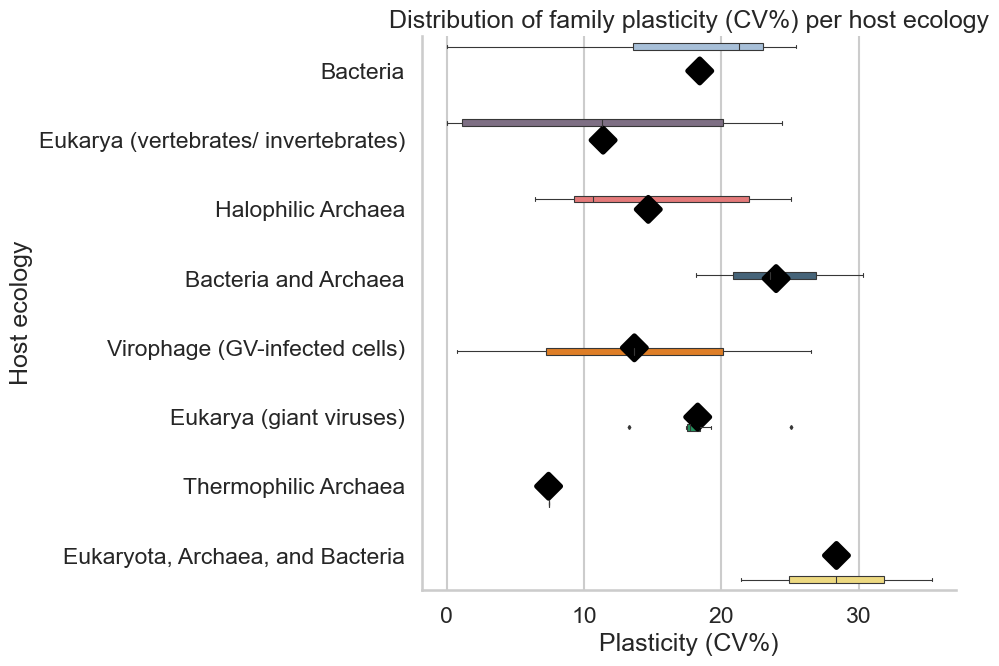

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0) compute per-family stats first ---
df = filtered_All_envs_df_with_metadata.copy()
df["family"] = df["family"].astype(str).str.strip()
drop_set = {"unclassified", "unclassified caudoviricetes"}
df = df[~df["family"].str.casefold().isin(drop_set)]
df["Host_ecology"] = df["family"].map(host_ecology).fillna("Unknown/Other")

agg = (
    df.dropna(subset=["Average_pI", "family"])
      .groupby("family", as_index=False)
      .agg(
          mean_pI=("Average_pI", "mean"),
          sd_pI=("Average_pI", "std"),
          Host_ecology=("Host_ecology", "first")
      )
)
agg["CV_percent"] = np.where(
    agg["mean_pI"].abs() > 0,
    100.0 * agg["sd_pI"] / agg["mean_pI"].abs(),
    np.nan
)
agg = agg.dropna(subset=["CV_percent", "mean_pI"])

# --- 1) custom colors ---
custom_colors = {
    "Bacteria": "#9FBFE0",
    "Bacteria and Archaea": "#3D6682",
    "Eukarya (giant viruses)": "#13A45F",
    "Eukarya (vertebrates/ invertebrates)": "#7F6B88",
    "Eukaryota, Archaea, and Bacteria": "#FFE46F",
    "Halophilic Archaea": "#F56969",
    "Thermophilic Archaea": "#09B0B2",
    "Virophage (GV-infected cells)": "#FD7C08",
    "Eukarya (Plants)": "#6050AF",
    "Unknown/Other": "lightgrey",
}
palette = {k: v for k, v in custom_colors.items() if k in agg["Host_ecology"].unique()}

# --- 2) box + summary dot plot (axes flipped) ---
sns.set_context("talk")
plt.figure(figsize=(10, 7))

# Boxplots: distribution of mean_pI per host ecology, along y-axis
sns.boxplot(
    data=agg,
    x="CV_percent",
    y="Host_ecology",
    hue="Host_ecology",
    palette=palette,
    showcaps=True,
    fliersize=2,
    linewidth=0.8
)

# Overlay mean points per host group (one dot per group)
sns.pointplot(
    data=agg,
    x="CV_percent",
    y="Host_ecology",
    order=agg["Host_ecology"].unique(),
    join=False,
    color="black",
    markers="D",
    scale=1.2,
    ci=None
)

plt.xlabel("Plasticity (CV%)")
plt.ylabel("Host ecology")
plt.title("Distribution of family plasticity (CV%) per host ecology")
plt.legend([],[], frameon=False)  # remove duplicate legend
sns.despine()
plt.tight_layout()
plt.show()


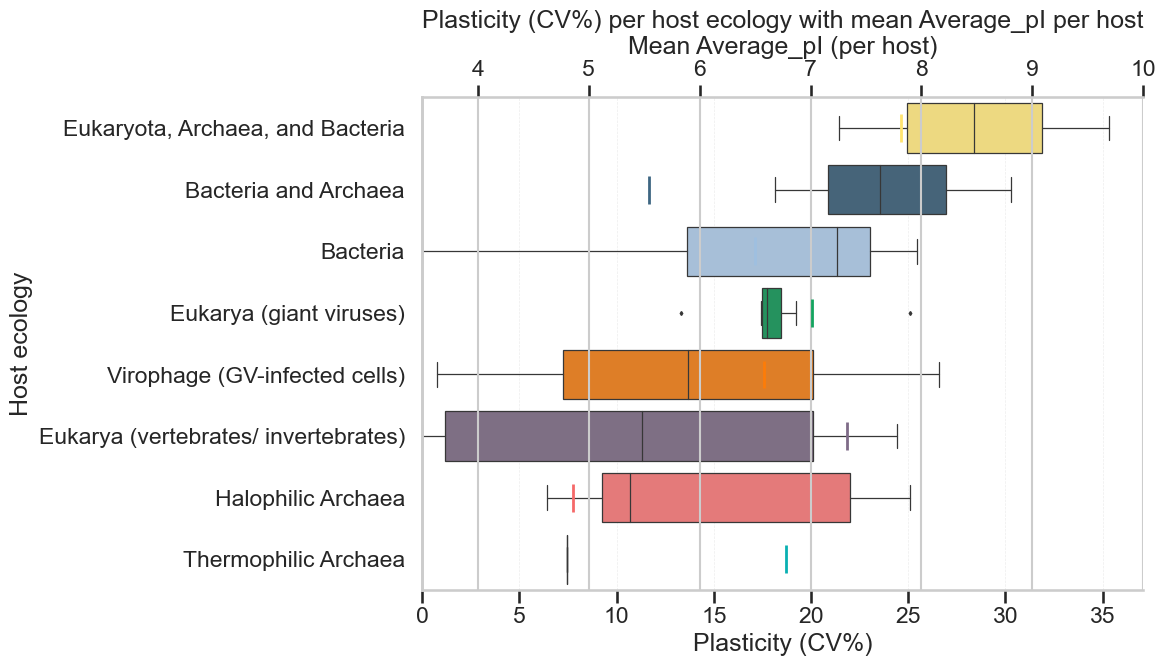

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0) data prep ---
df = filtered_All_envs_df_with_metadata.copy()
df["family"] = df["family"].astype(str).str.strip()

# Drop unwanted families (case-insensitive)
drop_set = {"unclassified", "unclassified caudoviricetes"}
df = df[~df["family"].str.casefold().isin(drop_set)]

# Map host ecology
df["Host_ecology"] = df["family"].map(host_ecology).fillna("Unknown/Other")

# --- 1) per-family stats for plasticity (CV%) ---
fam = (
    df.dropna(subset=["Average_pI", "family"])
      .groupby(["family"], as_index=False)
      .agg(
          mean_pI=("Average_pI", "mean"),
          sd_pI=("Average_pI", "std"),
          Host_ecology=("Host_ecology", "first")
      )
)
fam["CV_percent"] = np.where(
    fam["mean_pI"].abs() > 0,
    100.0 * fam["sd_pI"] / fam["mean_pI"].abs(),
    np.nan
)
fam = fam.dropna(subset=["CV_percent"])

# --- 2) per-host mean Average_pI computed at the contig level (robust) ---
host_mean_pI = (
    df.dropna(subset=["Average_pI"])
      .groupby("Host_ecology")["Average_pI"]
      .mean()
)

# --- 3) custom colors (hosts) ---
custom_colors = {
    "Bacteria": "#9FBFE0",
    "Bacteria and Archaea": "#3D6682",
    "Eukarya (giant viruses)": "#13A45F",
    "Eukarya (vertebrates/ invertebrates)": "#7F6B88",
    "Eukaryota, Archaea, and Bacteria": "#FFE46F",
    "Halophilic Archaea": "#F56969",
    "Thermophilic Archaea": "#09B0B2",
    "Virophage (GV-infected cells)": "#FD7C08",
    "Eukarya (Plants)": "#6050AF",
    "Unknown/Other": "lightgrey",
}
present_hosts = fam["Host_ecology"].dropna().unique().tolist()
palette = {k: v for k, v in custom_colors.items() if k in present_hosts}

# Order hosts by median CV% (desc) so the most plastic appear at top
host_order = (
    fam.groupby("Host_ecology")["CV_percent"]
       .median()
       .sort_values(ascending=False)
       .index
)

# --- 4) plot: boxplot of CV% (x) by Host_ecology (y), plus top twin axis for mean pI ---
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(12, 7))

# Boxplots (colors = hosts)
sns.boxplot(
    data=fam,
    x="CV_percent",
    y="Host_ecology",
    order=host_order,
    palette=palette,
    showcaps=True,
    fliersize=2,
    linewidth=0.9,
    ax=ax,
)

# Axis labels / title
ax.set_xlabel("Plasticity (CV%)")
ax.set_ylabel("Host ecology")
ax.set_title("Plasticity (CV%) per host ecology with mean Average_pI per host")

# Optional: tighten/extend CV% axis a touch so boxes aren't cramped
x_min, x_max = fam["CV_percent"].min(), fam["CV_percent"].max()
pad = 0.05 * (x_max - x_min if np.isfinite(x_max - x_min) else 10)
ax.set_xlim(left=max(0, x_min - pad), right=x_max + pad)

# --- Top twin x-axis to show mean Average_pI per host as tick markers (no diamonds) ---
ax2 = ax.twiny()
# Keep pI range consistent with your preference
ax2.set_xlim(3.5, 10)
ax2.set_xlabel("Mean Average_pI (per host)")

# Plot a small tick marker at each host's mean pI, aligned to host rows
# We'll draw short vertical ticks using ax2.scatter with "|" marker.
y_positions = np.arange(len(host_order))  # 0..N-1 matching the categories
mean_pI_vals = [host_mean_pI.get(h, np.nan) for h in host_order]

ax2.scatter(
    mean_pI_vals,
    y_positions,
    marker="|",          # simple tick mark
    s=400,               # length of the tick; adjust if you want longer/shorter
    c=[palette.get(h, "lightgrey") for h in host_order],  # colored by host
    linewidths=2,
    zorder=3
)

# Tidy grid and style
ax.grid(True, axis="x", linestyle="--", linewidth=0.5, alpha=0.35)
sns.despine(ax=ax, left=False, bottom=False)
# For the top axis, remove spines on right/bottom for cleanliness
for spine in ["right", "bottom"]:
    ax2.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


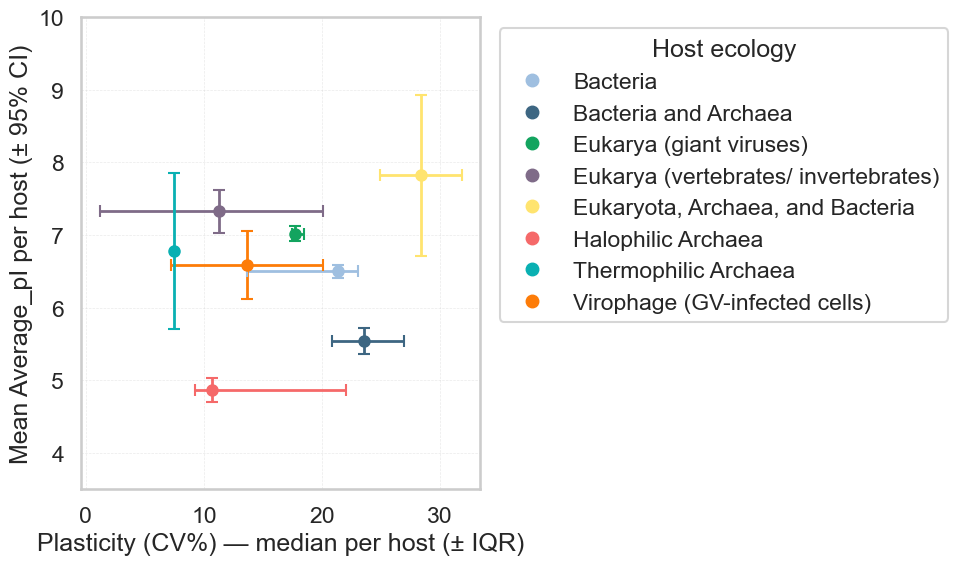

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- prep (reuse your objects) ---
df = filtered_All_envs_df_with_metadata.copy()
df["family"] = df["family"].astype(str).str.strip()
df = df[~df["family"].str.casefold().isin({"unclassified","unclassified caudoviricetes"})]
df["Host_ecology"] = df["family"].map(host_ecology).fillna("Unknown/Other")

# family-level stats for CV%
fam = (df.dropna(subset=["Average_pI","family"])
         .groupby("family", as_index=False)
         .agg(mean_pI=("Average_pI","mean"),
              sd_pI=("Average_pI","std"),
              Host_ecology=("Host_ecology","first")))
fam["CV_percent"] = np.where(fam["mean_pI"].abs()>0, 100*fam["sd_pI"]/fam["mean_pI"].abs(), np.nan)
fam = fam.dropna(subset=["CV_percent","mean_pI"])

# per-host summaries
host_cv = (fam.groupby("Host_ecology")["CV_percent"]
             .agg(cv_median="median",
                  cv_q1=lambda x: x.quantile(0.25),
                  cv_q3=lambda x: x.quantile(0.75)))
host_pi = (df.dropna(subset=["Average_pI"])
             .groupby("Host_ecology")["Average_pI"]
             .agg(mu="mean", sem="sem"))
summ = host_cv.join(host_pi, how="inner").reset_index()

# palette
custom_colors = {
    "Bacteria": "#9FBFE0",
    "Bacteria and Archaea": "#3D6682",
    "Eukarya (giant viruses)": "#13A45F",
    "Eukarya (vertebrates/ invertebrates)": "#7F6B88",
    "Eukaryota, Archaea, and Bacteria": "#FFE46F",
    "Halophilic Archaea": "#F56969",
    "Thermophilic Archaea": "#09B0B2",
    "Virophage (GV-infected cells)": "#FD7C08",
    "Eukarya (Plants)": "#6050AF",
    "Unknown/Other": "lightgrey",
}
summ = summ.sort_values("cv_median", ascending=False)

# --- plot ---
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 6))

for _, r in summ.iterrows():
    color = custom_colors.get(r["Host_ecology"], "lightgrey")
    # horizontal error (IQR of CV%)
    ax.errorbar(x=r["cv_median"], y=r["mu"],
                xerr=np.array([[r["cv_median"]-r["cv_q1"], r["cv_q3"]-r["cv_median"]]]).T,
                yerr=1.96*r["sem"], fmt="o", ms=8,
                color=color, ecolor=color, elinewidth=2, capsize=4, capthick=1.5)

# styling
ax.set_xlabel("Plasticity (CV%) — median per host (± IQR)")
ax.set_ylabel("Mean Average_pI per host (± 95% CI)")
ax.set_ylim(3.5, 10)  # your preferred pI range
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.4)

# legend
handles = [plt.Line2D([0],[0], marker="o", linestyle="", color=c, label=h) 
           for h, c in custom_colors.items() if h in set(summ["Host_ecology"])]
ax.legend(handles=handles, title="Host ecology", bbox_to_anchor=(1.02, 1),
          loc="upper left", frameon=True)

plt.tight_layout()
plt.show()


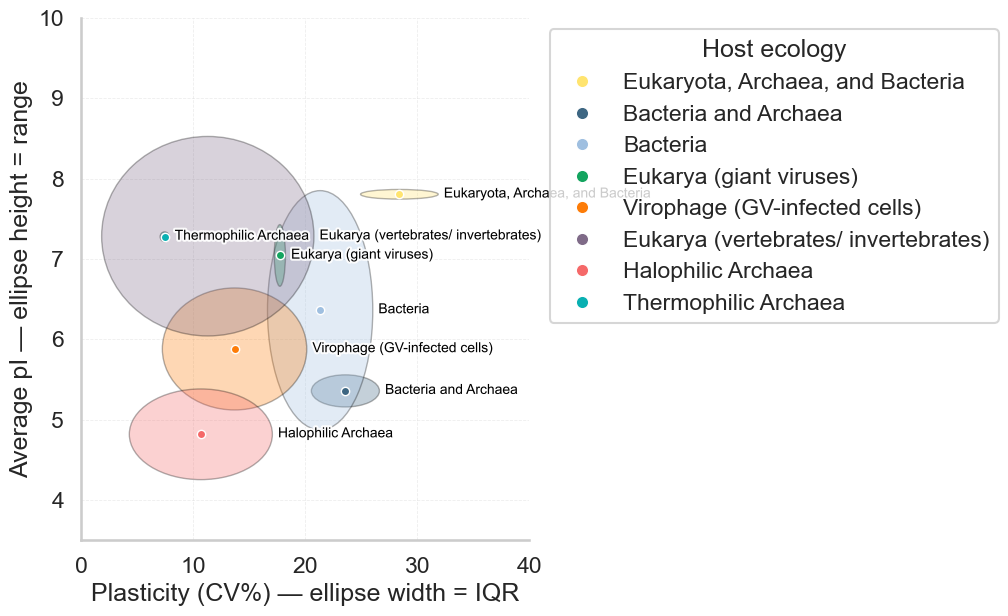

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patheffects as pe

# --- prep ---
df = filtered_All_envs_df_with_metadata.copy()
df["family"] = df["family"].astype(str).str.strip()
df = df[~df["family"].str.casefold().isin({"unclassified", "unclassified caudoviricetes"})]
df["Host_ecology"] = df["family"].map(host_ecology).fillna("Unknown/Other")

fam = (df.dropna(subset=["Average_pI","family"])
         .groupby("family", as_index=False)
         .agg(mean_pI=("Average_pI","mean"),
              sd_pI=("Average_pI","std"),
              Host_ecology=("Host_ecology","first")))
fam["CV_percent"] = np.where(
    fam["mean_pI"].abs()>0, 100*fam["sd_pI"]/fam["mean_pI"].abs(), np.nan
)
fam = fam.dropna(subset=["CV_percent","mean_pI"])

# per-host summaries
host_cv = (fam.groupby("Host_ecology")["CV_percent"]
             .agg(cv_median="median",
                  cv_q1=lambda x: x.quantile(0.25),
                  cv_q3=lambda x: x.quantile(0.75)))
host_pi = (fam.groupby("Host_ecology")["mean_pI"]
             .agg(pi_median="median",
                  pi_min="min",
                  pi_max="max"))
summ = host_cv.join(host_pi, how="inner").reset_index()
summ = summ.sort_values("cv_median", ascending=False).reset_index(drop=True)

# palette
custom_colors = {
    "Bacteria": "#9FBFE0",
    "Bacteria and Archaea": "#3D6682",
    "Eukarya (giant viruses)": "#13A45F",
    "Eukarya (vertebrates/ invertebrates)": "#7F6B88",
    "Eukaryota, Archaea, and Bacteria": "#FFE46F",
    "Halophilic Archaea": "#F56969",
    "Thermophilic Archaea": "#09B0B2",
    "Virophage (GV-infected cells)": "#FD7C08",
    "Eukarya (Plants)": "#6050AF",
    "Unknown/Other": "lightgrey",
}

# --- plot ---
sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(figsize=(10.5, 6.5))

ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.35)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)

MIN_W, MIN_H = 0.8, 0.12

for _, r in summ.iterrows():
    color = custom_colors.get(r["Host_ecology"], "lightgrey")

    cx, cy = r["cv_median"], r["pi_median"]
    w = max(r["cv_q3"] - r["cv_q1"], MIN_W)           # IQR of CV%
    h = max(r["pi_max"] - r["pi_min"], MIN_H)         # full range of Average_pI

    e = Ellipse((cx, cy), width=w, height=h, angle=0,
                facecolor=color, edgecolor="black", lw=1.0, alpha=0.30, zorder=2)
    ax.add_patch(e)

    ax.plot(cx, cy, "o", ms=6, mfc=color, mec="white", mew=1.0, zorder=3)
    ax.text(cx + w/2 + 0.5, cy, r["Host_ecology"],
            fontsize=10, va="center", color="black",
            path_effects=[pe.withStroke(linewidth=3, foreground="white", alpha=0.9)],
            zorder=4)

# --- axes ---
ax.set_xlabel("Plasticity (CV%) — ellipse width = IQR")
ax.set_ylabel("Average pI — ellipse height = range")
ax.set_ylim(3.5, 10)
ax.set_xlim(0, 40)   # fixed range for comparability

# legend
handles = [plt.Line2D([0],[0], marker="o", linestyle="",
                      mfc=custom_colors[h], mec="white", mew=1.0, ms=9, label=h)
           for h in summ["Host_ecology"]]
ax.legend(handles=handles, title="Host ecology",
          bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)

plt.tight_layout()
plt.savefig("/Users/skoog/Desktop/cv_all2.svg", format="svg", dpi=300, bbox_inches="tight", transparent=True)
plt.show()
